<h1>Dataset</h1>

https://www.kaggle.com/datasets/luisandresgarcia/stock-market-prediction

<h1>Importing Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<h1>Data Collection and Preprocessing</h1>

In [2]:
df = pd.read_csv('infolimpioavanzadoTarget.csv')
df.head()

date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN               NaN         0.919758   
1              NaN              NaN               NaN         1.110440   
2              NaN              NaN               NaN         0.889560   
3              NaN              NaN               NaN         1.497843   
4              NaN              NaN               NaN         1.188956   

       diff  INCREMENTO  TARGET  
0 -1.900001   -9.664295       0  
1 -1.379999   -7.247895       0  
2 -0.930000   -5.201344       0  
3 -0.360000   -2.177856       0  
4 -0.120000   -0.758054       0  

[5 rows x 1285 columns]

In [3]:
df_new = df[['date', 'open', 'high', 'low', 'close']]

In [4]:
df_new["next_day"]= df_new["close"].shift(-1)
df_new

date       open       high        low      close   next_day
0     2022-01-03  17.799999  18.219000  17.500000  17.760000  17.660000
1     2022-01-04  17.700001  18.309999  17.620001  17.660000  16.950001
2     2022-01-05  17.580000  17.799999  16.910000  16.950001  16.170000
3     2022-01-06  16.650000  16.879999  16.139999  16.170000  15.710000
4     2022-01-07  16.219999  16.290001  15.630000  15.710000  15.860000
...          ...        ...        ...        ...        ...        ...
7776  2022-12-23  23.250000  23.540001  23.250000  23.290001  23.350000
7777  2022-12-27  23.350000  23.610001  23.250000  23.350000  23.350000
7778  2022-12-28  23.450001  23.570000  23.219999  23.350000  23.610001
7779  2022-12-29  23.330000  23.740000  23.330000  23.610001  23.610001
7780  2022-12-30  23.680000  23.760000  23.610001  23.610001        NaN

[7781 rows x 6 columns]

In [5]:
df_new["target"] = df_new["next_day"] > df_new["close"].astype(float)
df_new

date       open       high        low      close   next_day  \
0     2022-01-03  17.799999  18.219000  17.500000  17.760000  17.660000   
1     2022-01-04  17.700001  18.309999  17.620001  17.660000  16.950001   
2     2022-01-05  17.580000  17.799999  16.910000  16.950001  16.170000   
3     2022-01-06  16.650000  16.879999  16.139999  16.170000  15.710000   
4     2022-01-07  16.219999  16.290001  15.630000  15.710000  15.860000   
...          ...        ...        ...        ...        ...        ...   
7776  2022-12-23  23.250000  23.540001  23.250000  23.290001  23.350000   
7777  2022-12-27  23.350000  23.610001  23.250000  23.350000  23.350000   
7778  2022-12-28  23.450001  23.570000  23.219999  23.350000  23.610001   
7779  2022-12-29  23.330000  23.740000  23.330000  23.610001  23.610001   
7780  2022-12-30  23.680000  23.760000  23.610001  23.610001        NaN   

      target  
0      False  
1      False  
2      False  
3      False  
4       True  
...      ...  
7776    True  
7777   False  
7778    True  
7779   False  
7780   False  

[7781 rows x 7 columns]

In [6]:
df_new.isnull().sum()

date        0
open        0
high        0
low         0
close       0
next_day    1
target      0
dtype: int64

In [7]:
df_new.isnull().sum()

date        0
open        0
high        0
low         0
close       0
next_day    1
target      0
dtype: int64

In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      7781 non-null   object 
 1   open      7781 non-null   float64
 2   high      7781 non-null   float64
 3   low       7781 non-null   float64
 4   close     7781 non-null   float64
 5   next_day  7780 non-null   float64
 6   target    7781 non-null   bool   
dtypes: bool(1), float64(5), object(1)
memory usage: 372.5+ KB


In [9]:
df_new['next_day'].fillna(df['close'])

0       17.660000
1       16.950001
2       16.170000
3       15.710000
4       15.860000
          ...    
7776    23.350000
7777    23.350000
7778    23.610001
7779    23.610001
7780    23.610001
Name: next_day, Length: 7781, dtype: float64

In [10]:
df_new.loc[:, 'date'] = pd.to_datetime(df_new['date'])

In [11]:
summary_stats = df_new.describe()
print(summary_stats)

              open         high          low        close     next_day
count  7781.000000  7781.000000  7781.000000  7781.000000  7780.000000
mean     34.990220    35.655999    34.301243    34.964414    34.966626
std      99.841502   101.451058    98.073945    99.790823    99.797047
min       0.410000     0.435000     0.405000     0.408000     0.408000
25%       4.050000     4.130000     3.980000     4.030000     4.030000
50%      10.080000    10.110000    10.005000    10.080000    10.080000
75%      24.350000    24.500000    24.080000    24.250000    24.251750
max     795.739990   799.359985   784.960022   797.489990   797.489990


In [12]:
#Creating dictionary to store different companies' data separately

company_list = df['ticker'].unique()
company_data_dict = {}

for ticker in company_list:
    company_data_dict[ticker] = df_new[df['ticker'] == ticker]

print(company_data_dict)

{'ASLE':                     date       open       high        low      close  \
0    2022-01-03 00:00:00  17.799999  18.219000  17.500000  17.760000   
1    2022-01-04 00:00:00  17.700001  18.309999  17.620001  17.660000   
2    2022-01-05 00:00:00  17.580000  17.799999  16.910000  16.950001   
3    2022-01-06 00:00:00  16.650000  16.879999  16.139999  16.170000   
4    2022-01-07 00:00:00  16.219999  16.290001  15.630000  15.710000   
..                   ...        ...        ...        ...        ...   
246  2022-12-23 00:00:00  15.360000  15.590000  15.240000  15.380000   
247  2022-12-27 00:00:00  15.430000  15.825000  15.100000  15.670000   
248  2022-12-28 00:00:00  15.690000  15.940000  15.450000  15.760000   
249  2022-12-29 00:00:00  15.880000  16.070000  15.770000  16.040001   
250  2022-12-30 00:00:00  16.000000  16.240000  15.770000  16.219999   

      next_day  target  
0    17.660000   False  
1    16.950001   False  
2    16.170000   False  
3    15.710000   False  
4

In [13]:
#Checking for duplicate values

for ticker in company_list:
    temp_df = df_new[df['ticker'] == ticker]
    print(f"{ticker}: {temp_df.duplicated().any()}")

ASLE: False
ASLN: False
ASMB: False
ASML: False
ASND: False
ASO: False
ASPA: False
ASPAU: False
ASPS: False
ASRT: False
ASRV: False
ASTC: False
ASTE: False
ASTL: False
ASTR: False
ASTS: False
ASUR: False
ASYS: False
ATAI: False
ATCOL: False
ATEC: False
ATER: False
ATEX: False
ATHA: False
ATHE: False
ATHX: False
ATIF: False
ATLC: False
ATLCL: False
ATLCP: False
ATLO: False


<h1>Exploratory Data Analysis</h1>

<font size="3" color="blue" face="verdana"><b>1. Time Series Analysis </b></font>

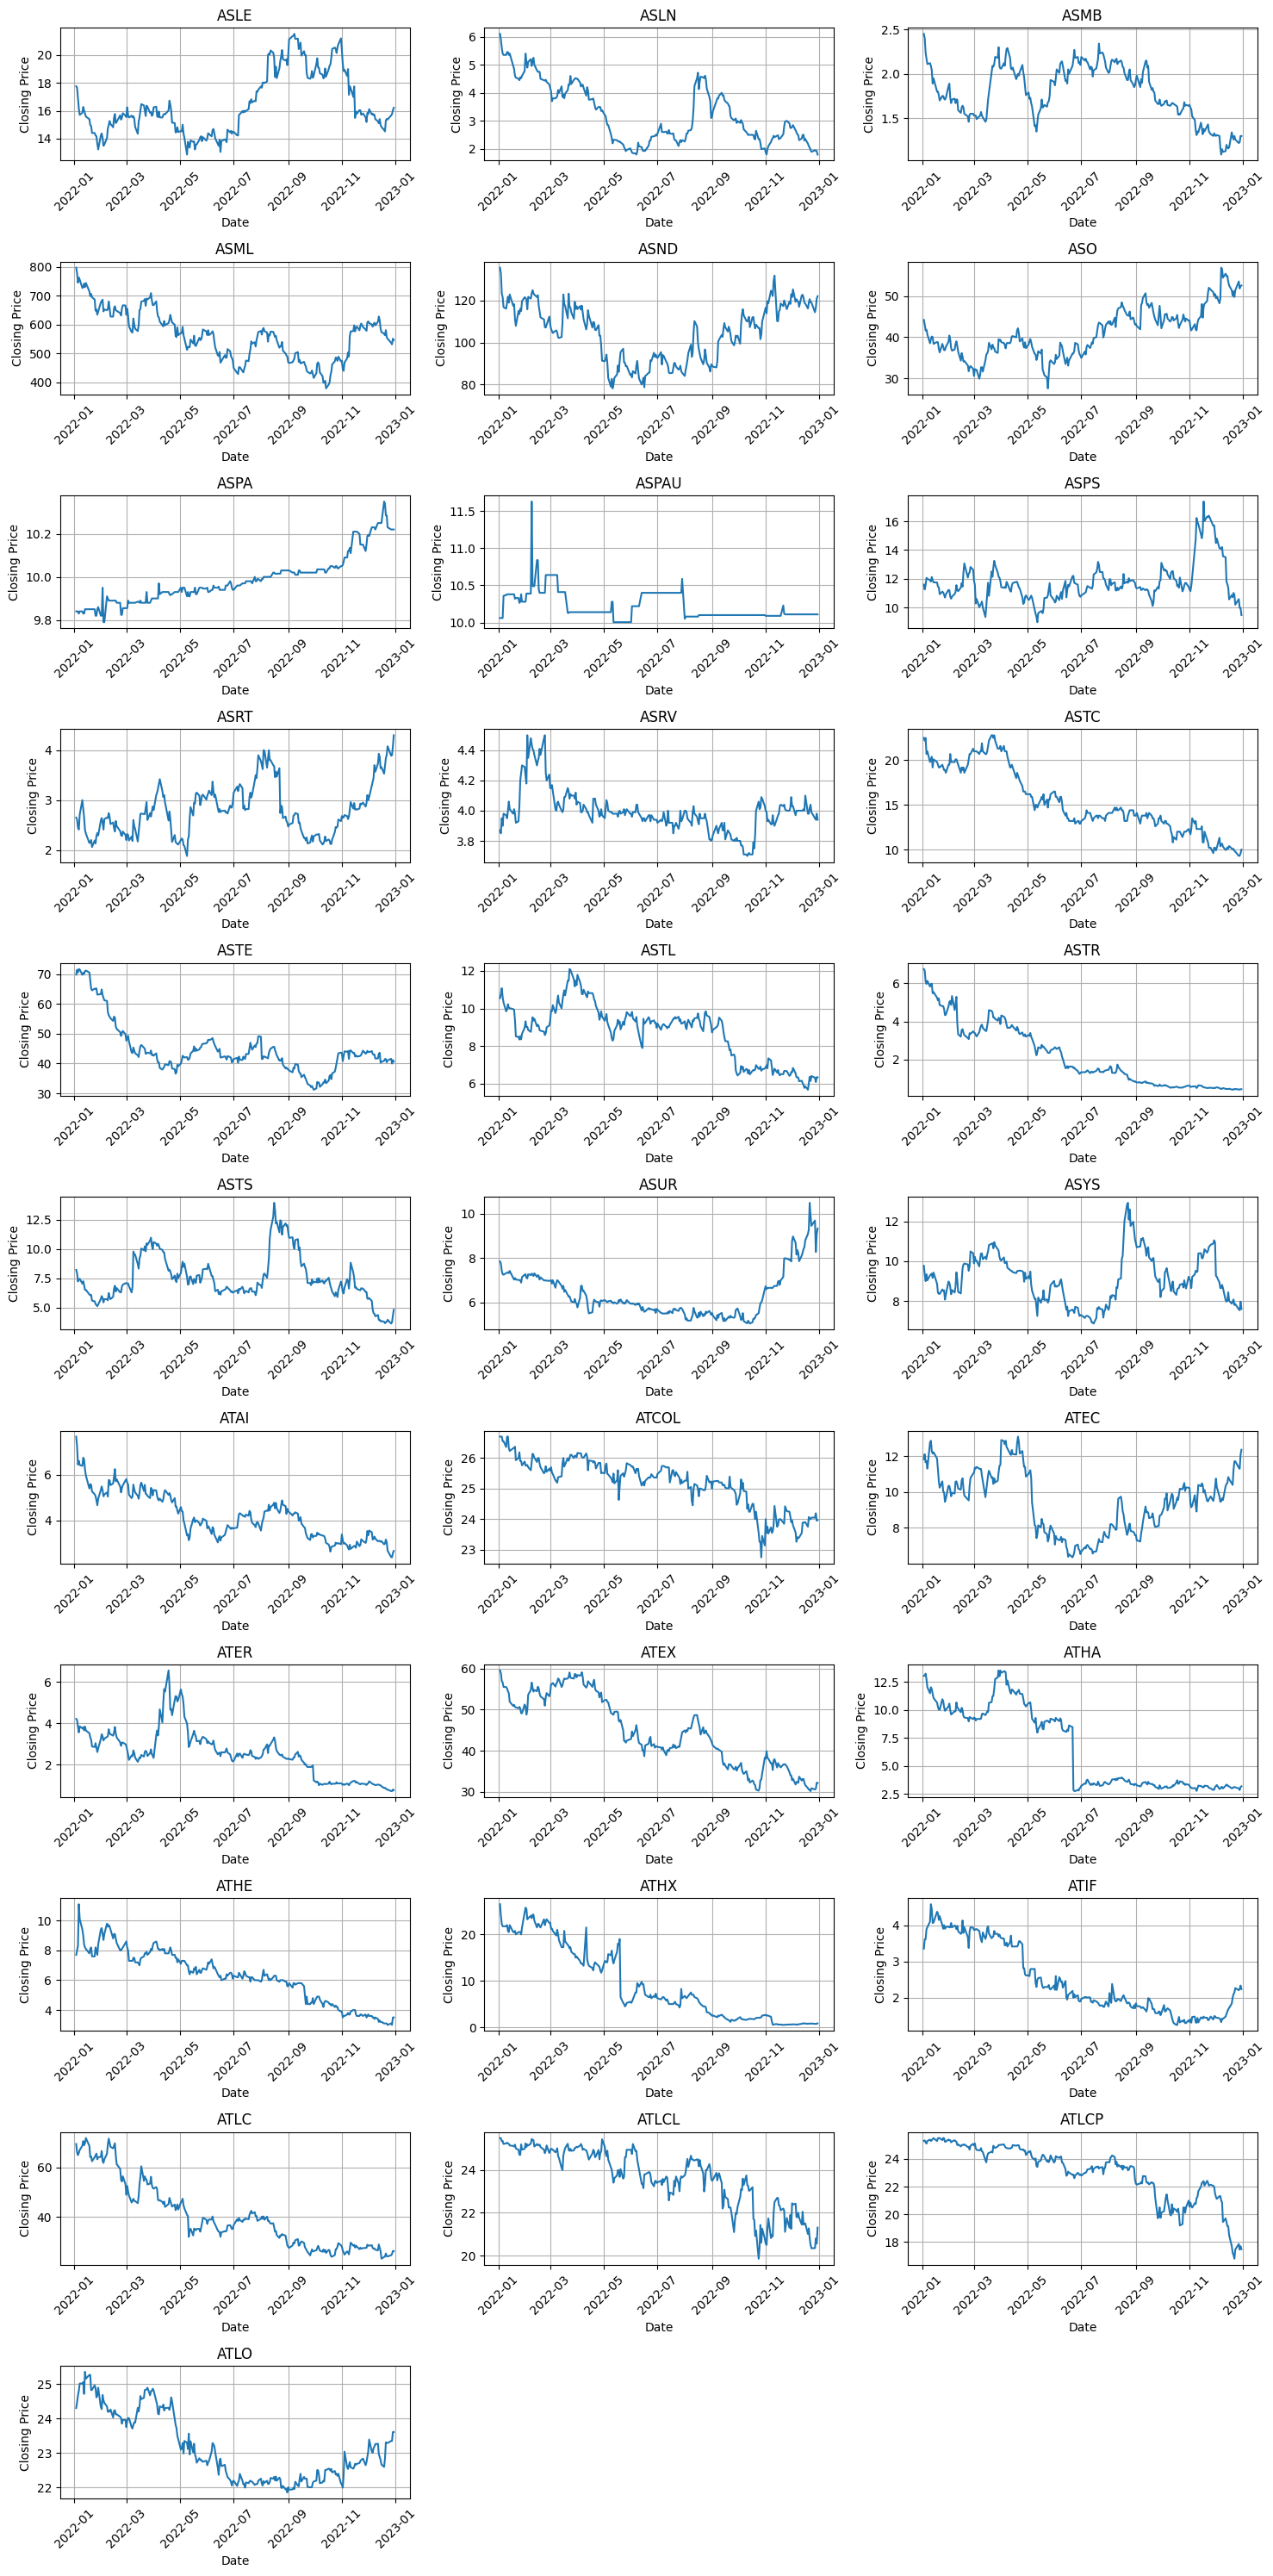

In [14]:
plt.figure(figsize=(15, 30))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    company_data = company_data_dict[company]
    plt.subplot(11, 3, i)
    plt.plot(company_data['date'], company_data['close'])
    plt.ylabel('Closing Price')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.title(f"{company_list[i - 1]}")
    plt.grid()

plt.tight_layout()

<font size="3" color="blue" face="verdana"><b>2. Box Plot for Closing Price of each company </b></font>

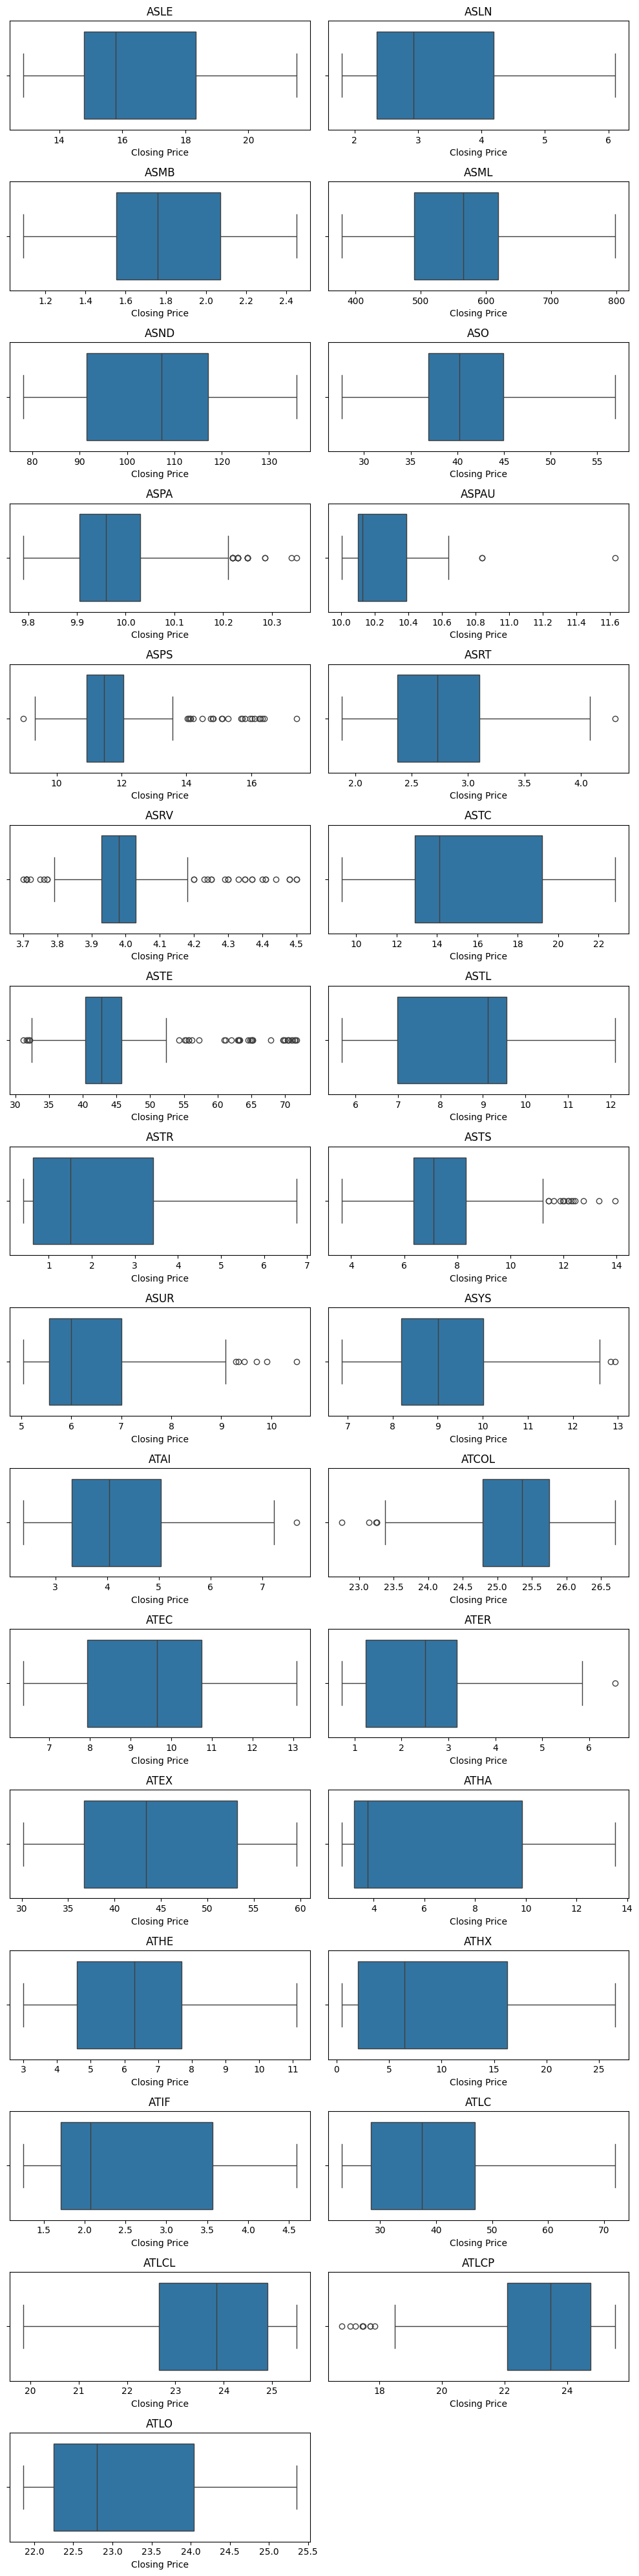

In [15]:
plt.figure(figsize=(10, 40))

for i, company in enumerate(company_list, 1):
    company_data = company_data_dict[company]
    plt.subplot(16, 2, i)
    sns.boxplot(x='close', data=company_data)
    plt.xlabel("Closing Price")
    plt.title(f'{company}')

plt.tight_layout()
plt.show()

<font size="3" color="blue" face="verdana"><b>3. Analysing Daily Returns for each company </b></font>

# 

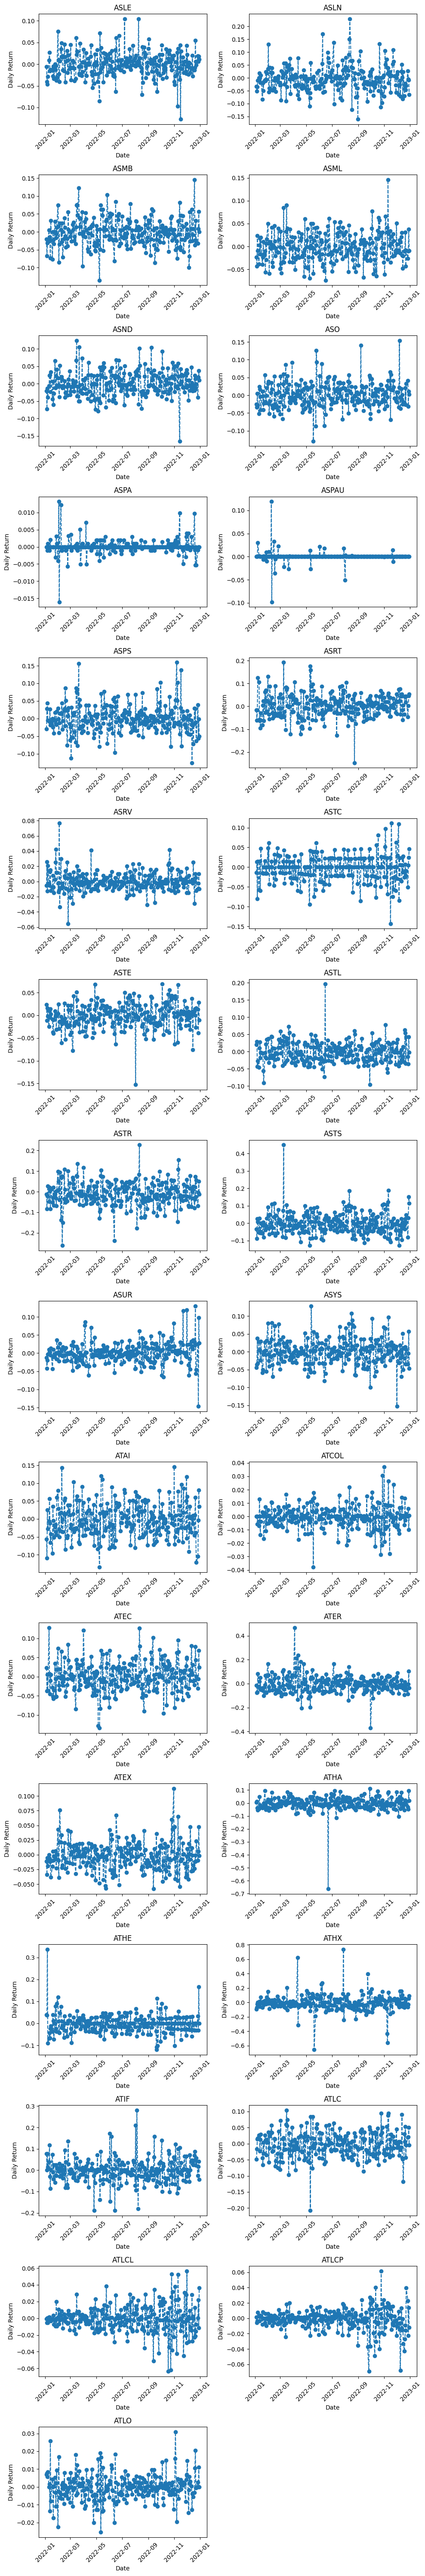

In [16]:
plt.figure(figsize=(10, 60))
plotnumber = 1
for company in company_list:
    company_data = company_data_dict[company]
    company_data['Daily Return'] = company_data['close'].pct_change()
    if plotnumber<=31:
        ax = plt.subplot(16, 2, plotnumber)
        ax.plot(company_data['date'], company_data['Daily Return'], linestyle='--', marker='o')
        ax.set_title(company)
        ax.set_xlabel('Date')  # Set x-axis label
        ax.set_ylabel('Daily Return')
        ax.tick_params(axis='x', rotation=45)
    plotnumber+=1


plt.tight_layout()
plt.show()

<BR>
<h1>MACHINE LEARNING MODELS FOR STOCK PRICE PREDICTION</h1>

<h3>Linear Regression</h3>

For ASLE:
Mean Squared Error: 0.06452565505159956
R^2 Score: 0.9839042125316576


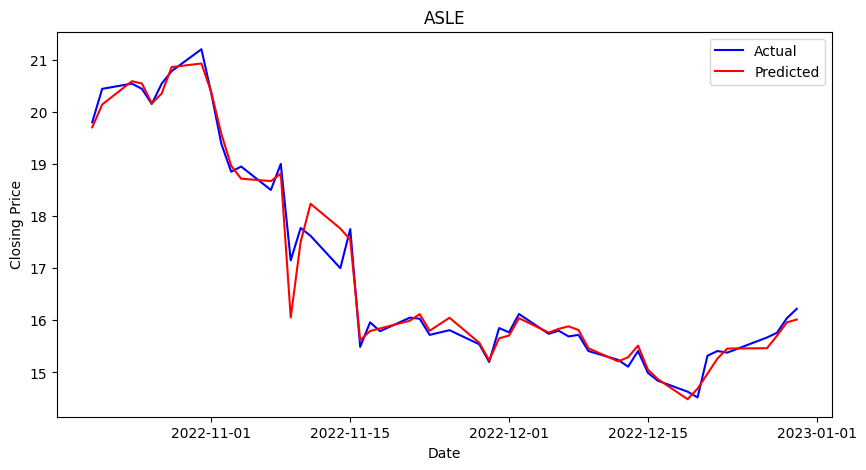



For ASLN:
Mean Squared Error: 0.0044199287031558955
R^2 Score: 0.955587105000448


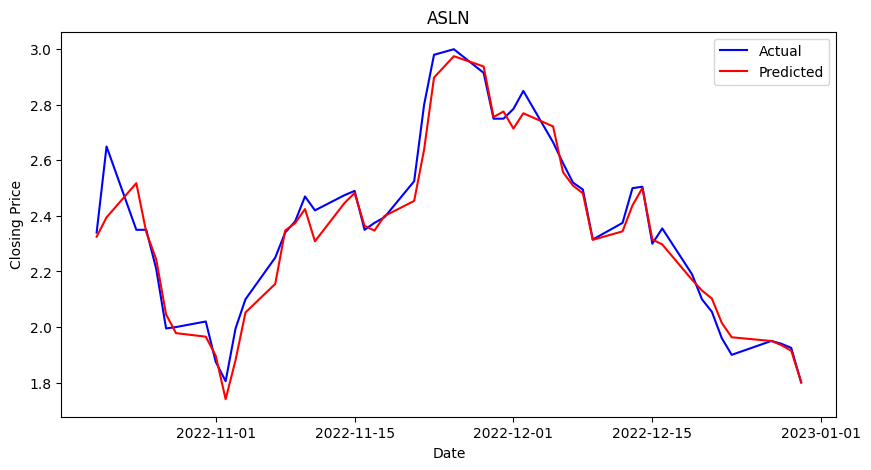



For ASMB:
Mean Squared Error: 0.0007551735662348232
R^2 Score: 0.9708167586569533


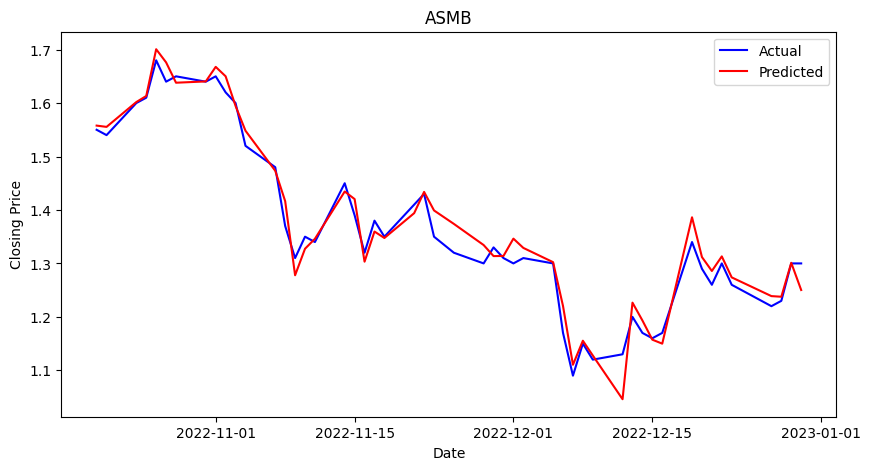



For ASML:
Mean Squared Error: 27.57614366166177
R^2 Score: 0.9910413612228186


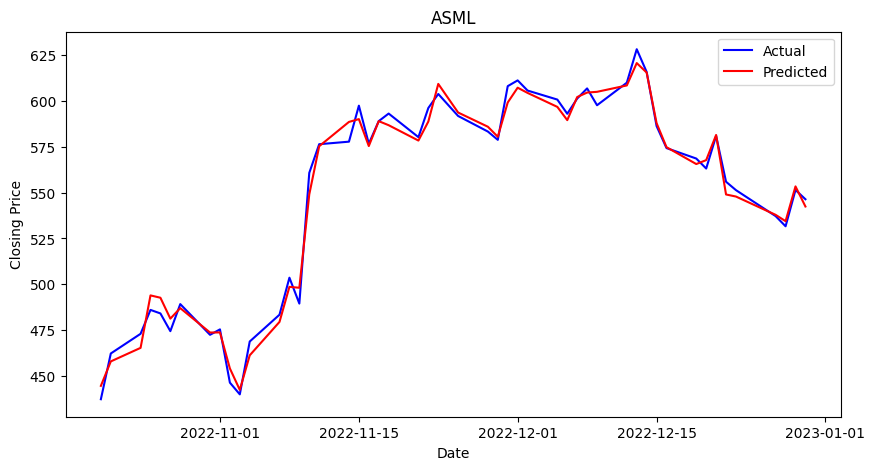



For ASND:
Mean Squared Error: 2.71741169779695
R^2 Score: 0.9251694643393603


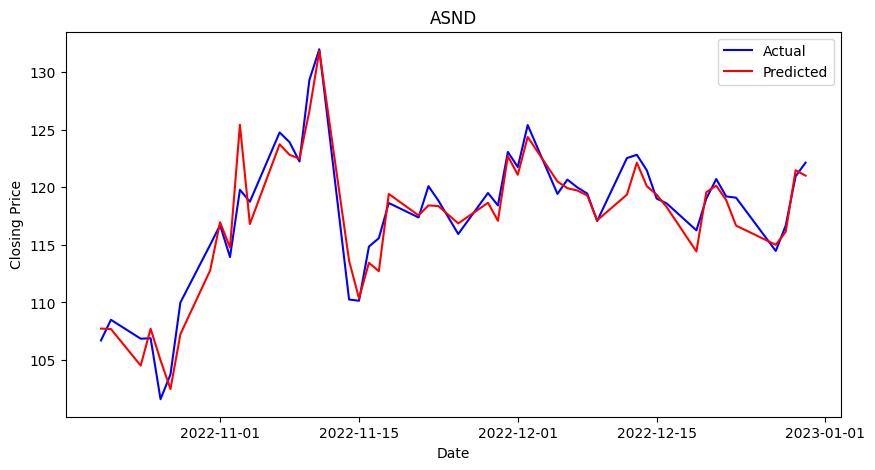



For ASO:
Mean Squared Error: 0.3224277010655594
R^2 Score: 0.9835803314178899


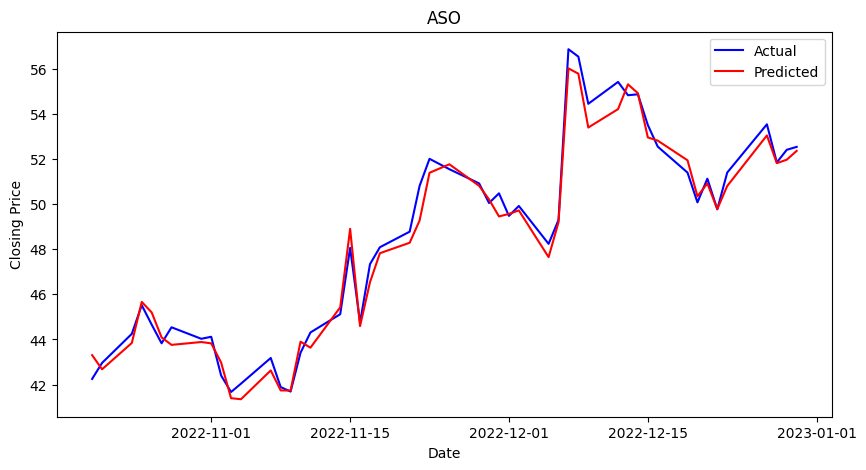



For ASPA:
Mean Squared Error: 0.00037027134466422926
R^2 Score: 0.9466626138704161


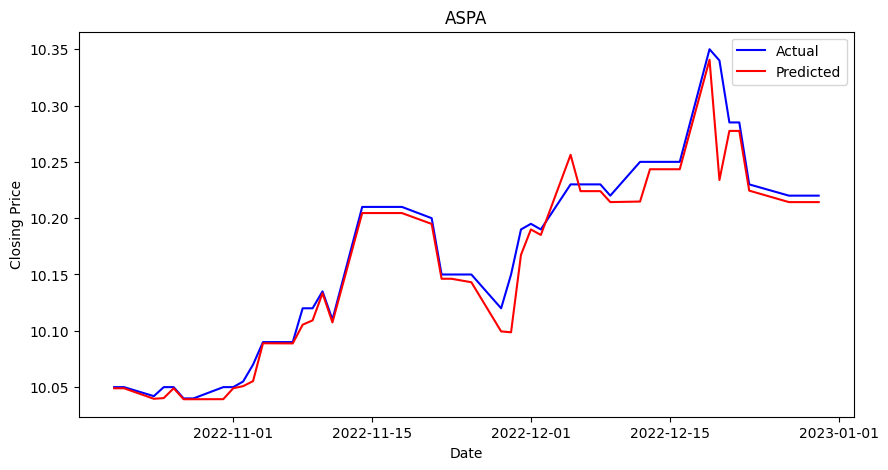



For ASPAU:
Mean Squared Error: 0.0005483527492140091
R^2 Score: -0.3818188510723801


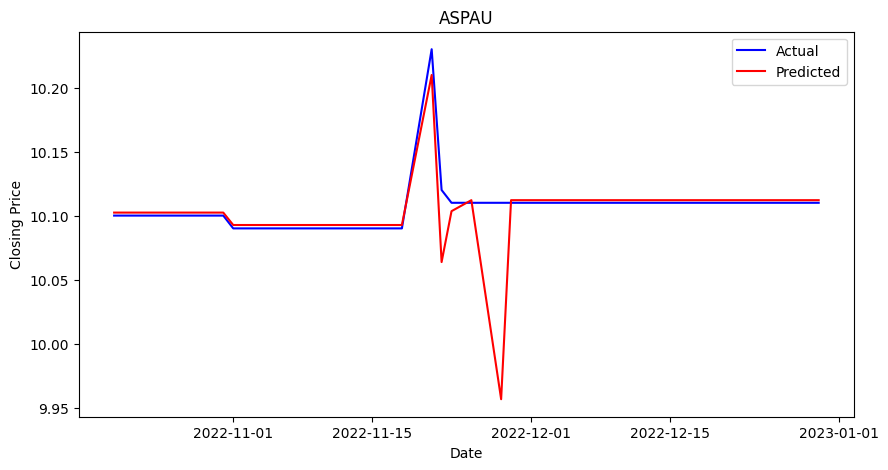



For ASPS:
Mean Squared Error: 0.07455501414590032
R^2 Score: 0.9849322270040914


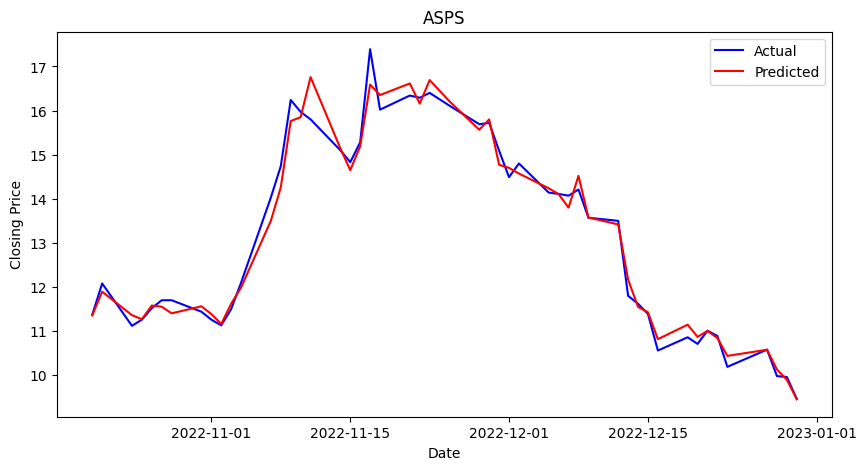



For ASRT:
Mean Squared Error: 0.0021128570711072296
R^2 Score: 0.9931829083095385


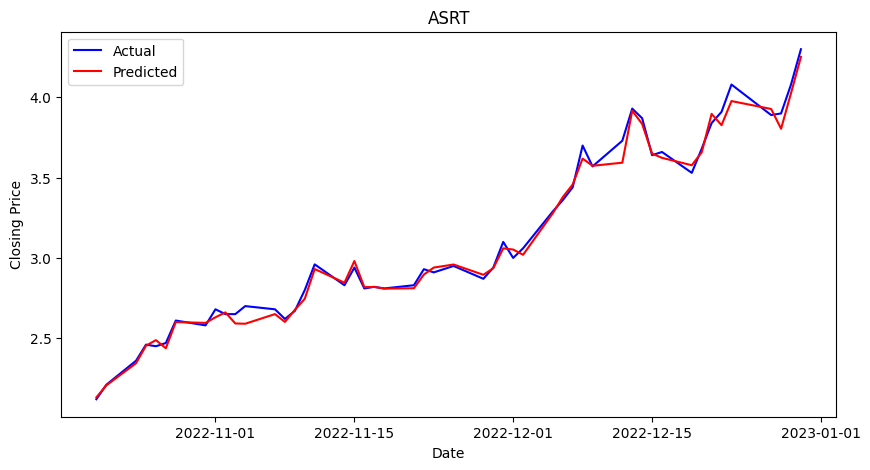



For ASRV:
Mean Squared Error: 0.0008452933185222095
R^2 Score: 0.6719397563416156


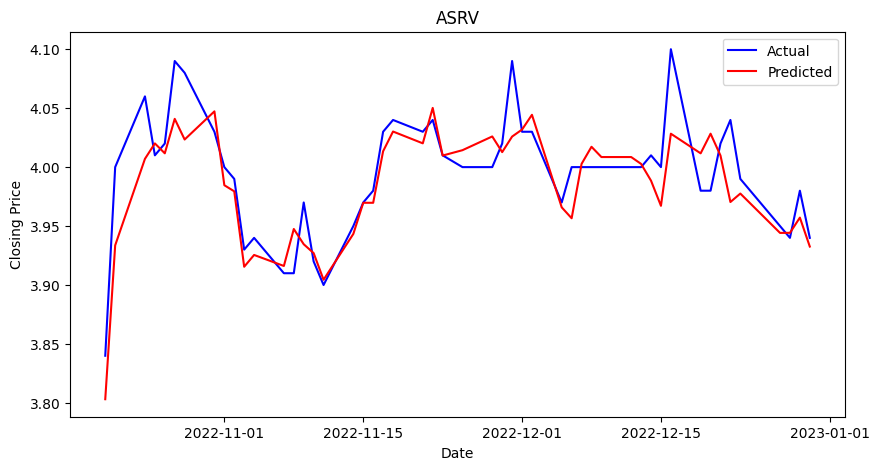



For ASTC:
Mean Squared Error: 0.0728212000452827
R^2 Score: 0.940775957731142


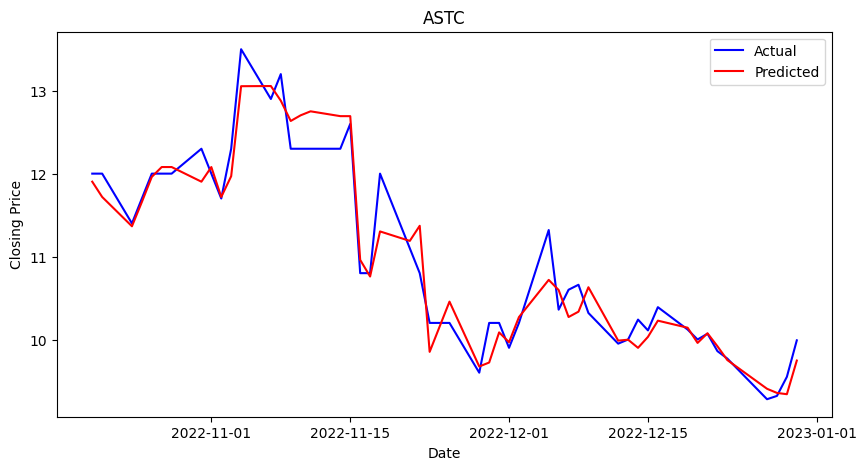



For ASTE:
Mean Squared Error: 0.20963579904585722
R^2 Score: 0.949536441376432


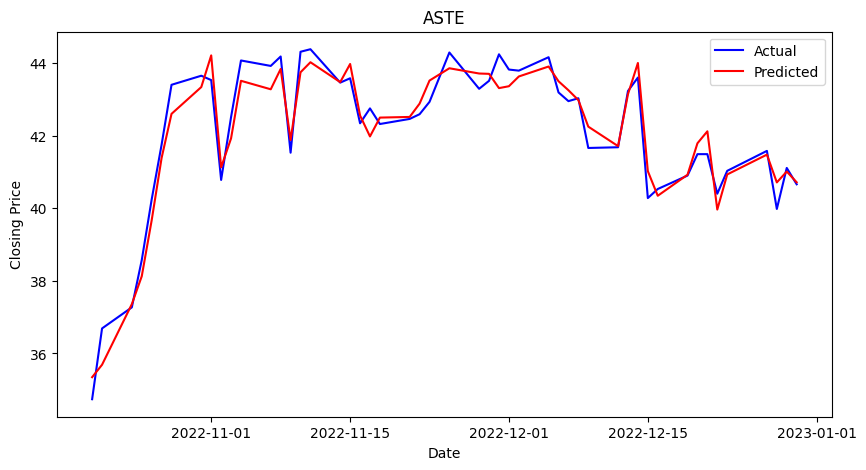



For ASTL:
Mean Squared Error: 0.00797211717874734
R^2 Score: 0.9358664741872667


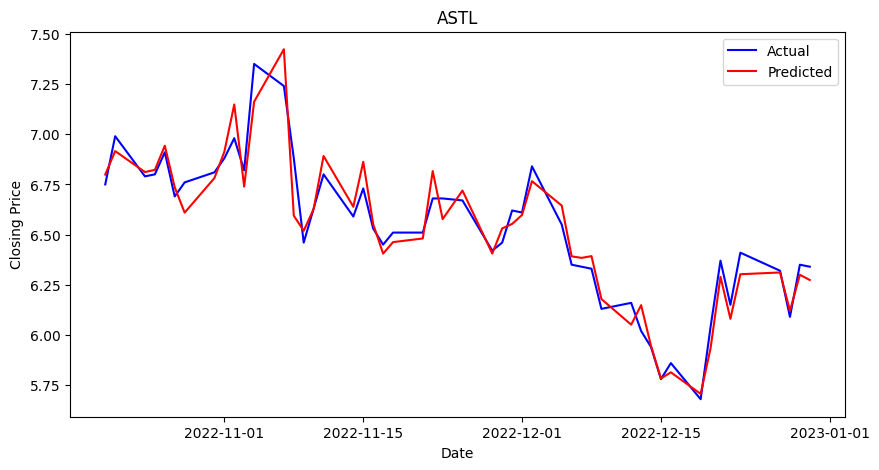



For ASTR:
Mean Squared Error: 0.00012699522819562182
R^2 Score: 0.9674900350287677


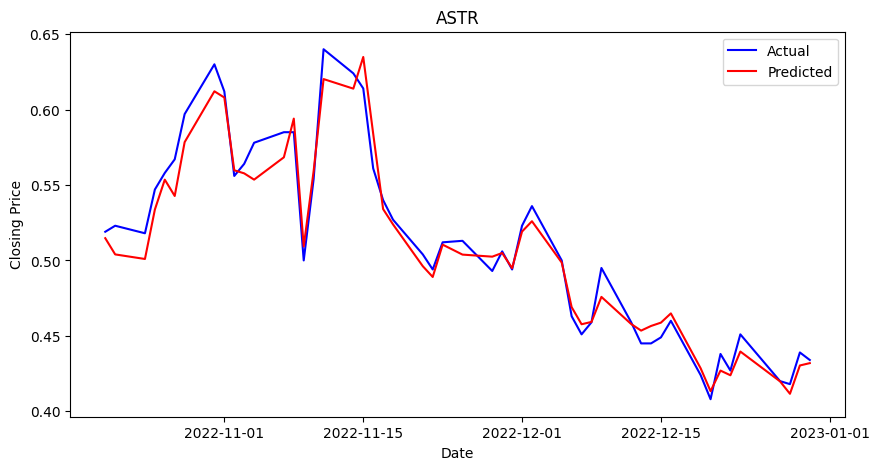



For ASTS:
Mean Squared Error: 0.02955983259623816
R^2 Score: 0.9838221758922328


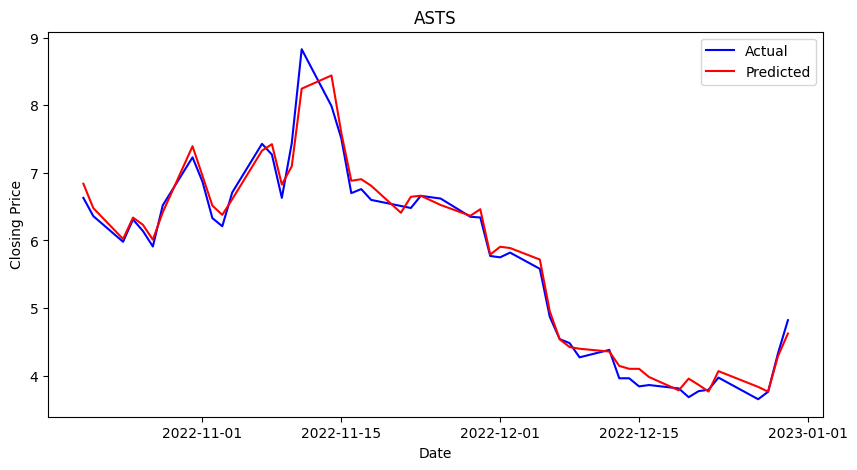



For ASUR:
Mean Squared Error: 0.03783992127651945
R^2 Score: 0.9761789035743889


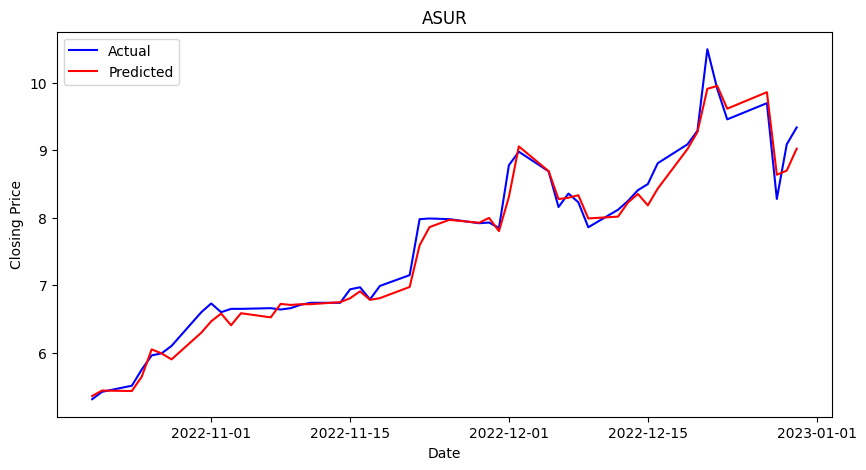



For ASYS:
Mean Squared Error: 0.025824341181964302
R^2 Score: 0.9751436551387578


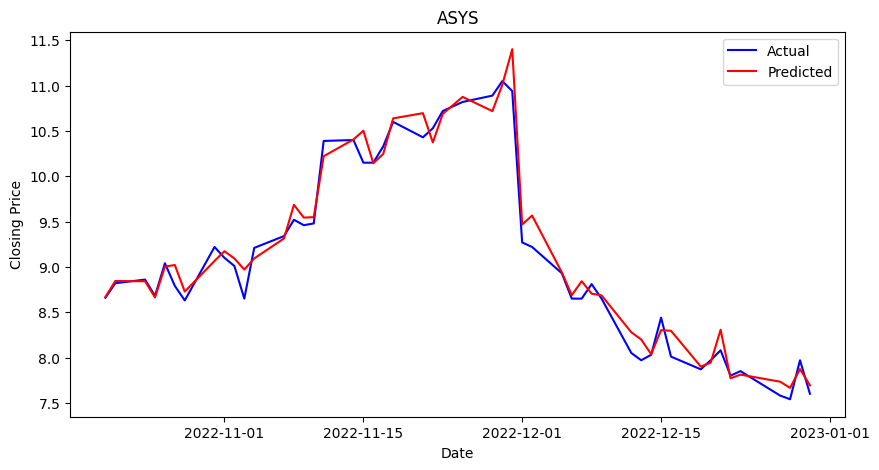



For ATAI:
Mean Squared Error: 0.0028186674549673975
R^2 Score: 0.9522825935303323


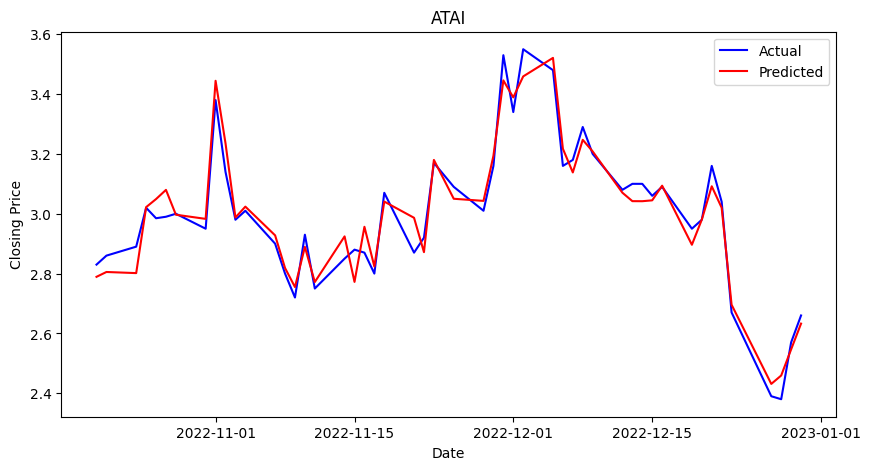



For ATCOL:
Mean Squared Error: 0.011164174802757743
R^2 Score: 0.9019347487359506


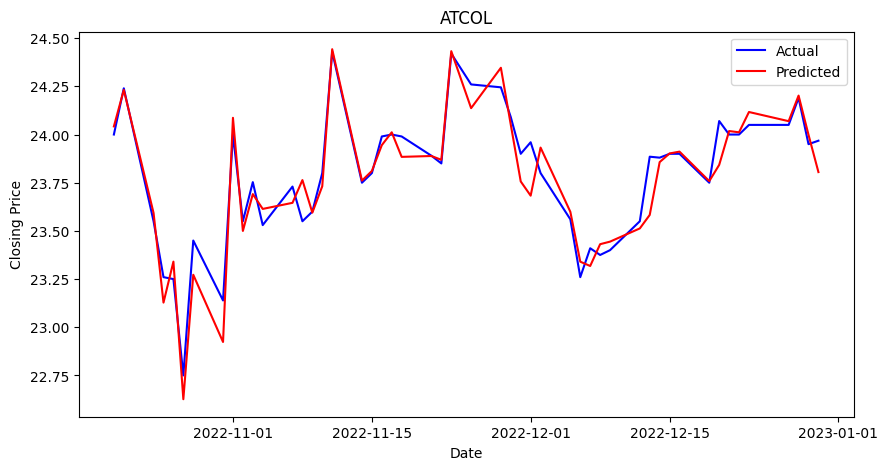



For ATEC:
Mean Squared Error: 0.0435003030762862
R^2 Score: 0.9214060741226271


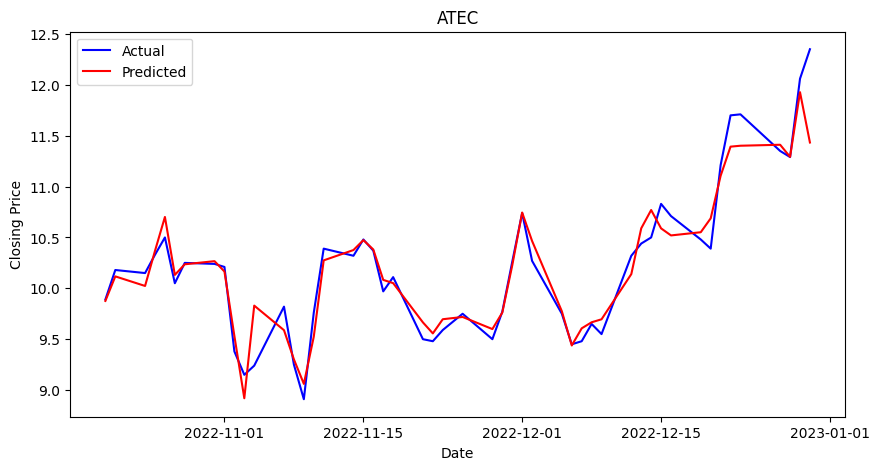



For ATER:
Mean Squared Error: 0.0005313396637476338
R^2 Score: 0.963957455600151


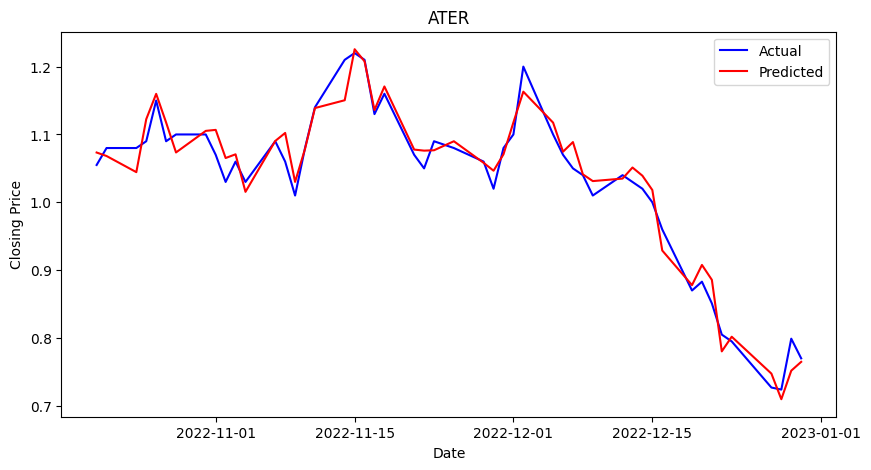



For ATEX:
Mean Squared Error: 0.2981273000765494
R^2 Score: 0.959214989658906


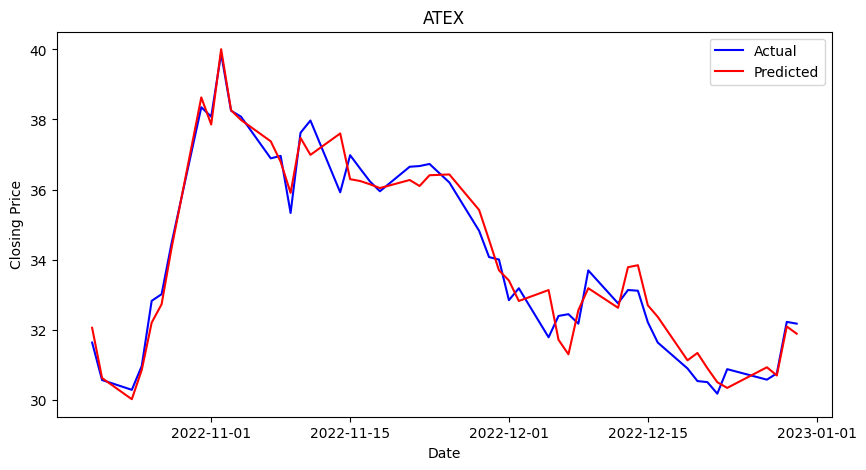



For ATHA:
Mean Squared Error: 0.0015353609656188927
R^2 Score: 0.9506596600282701


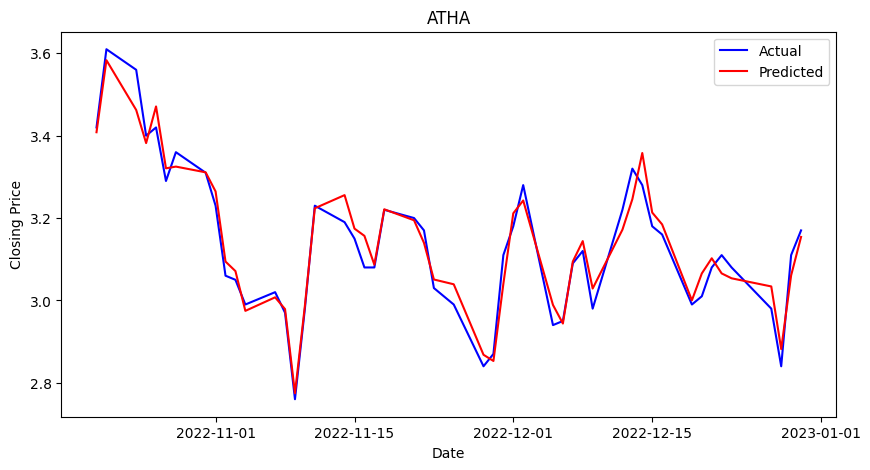



For ATHE:
Mean Squared Error: 0.010336816981577545
R^2 Score: 0.9191324315537189


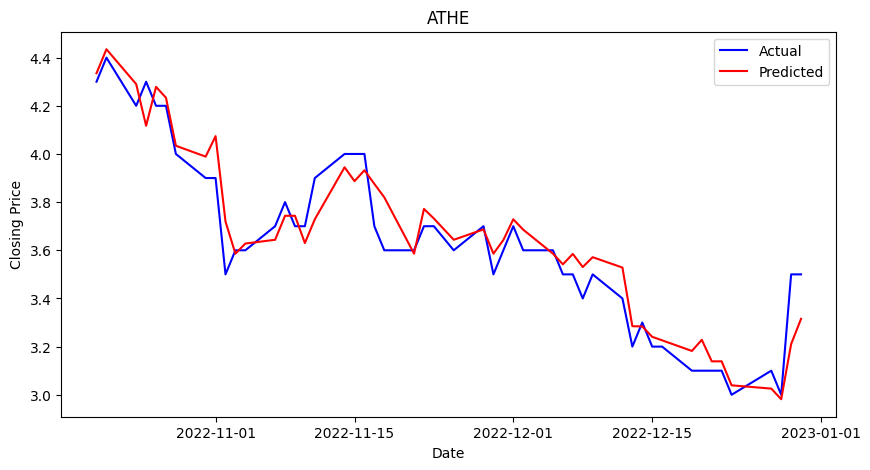



For ATHX:
Mean Squared Error: 0.0012692954607157769
R^2 Score: 0.9976133326282839


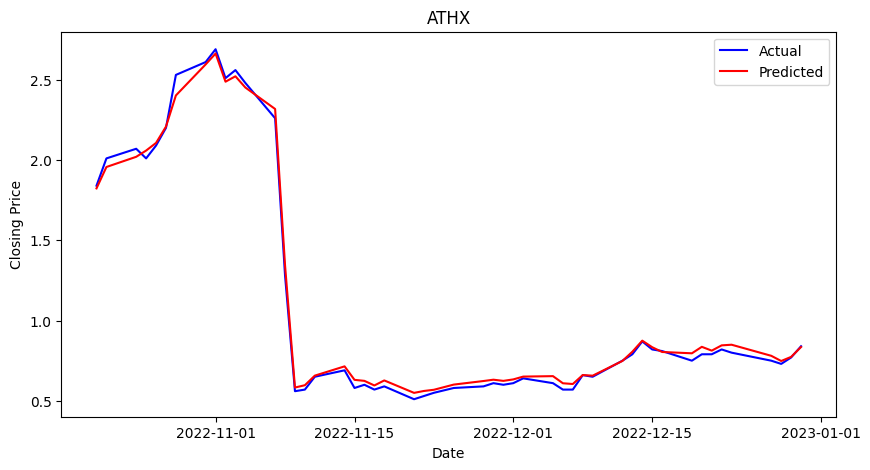



For ATIF:
Mean Squared Error: 0.006271265826556444
R^2 Score: 0.9295780952086993


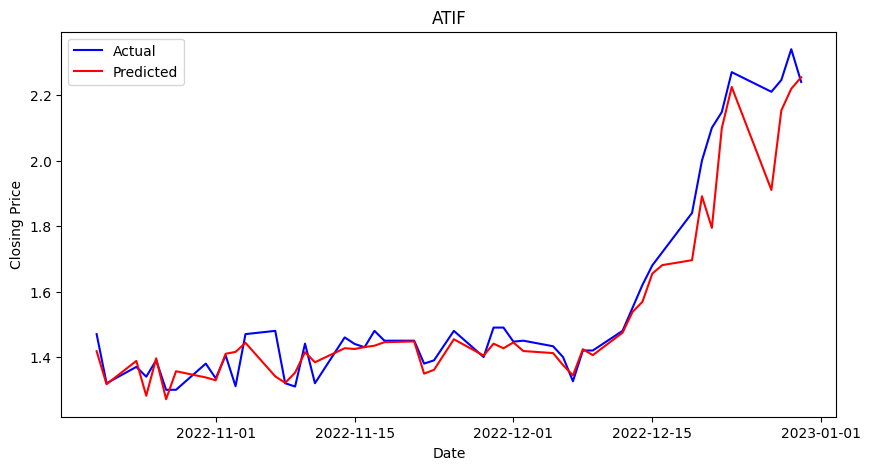



For ATLC:
Mean Squared Error: 0.24919214729424094
R^2 Score: 0.91066300584409


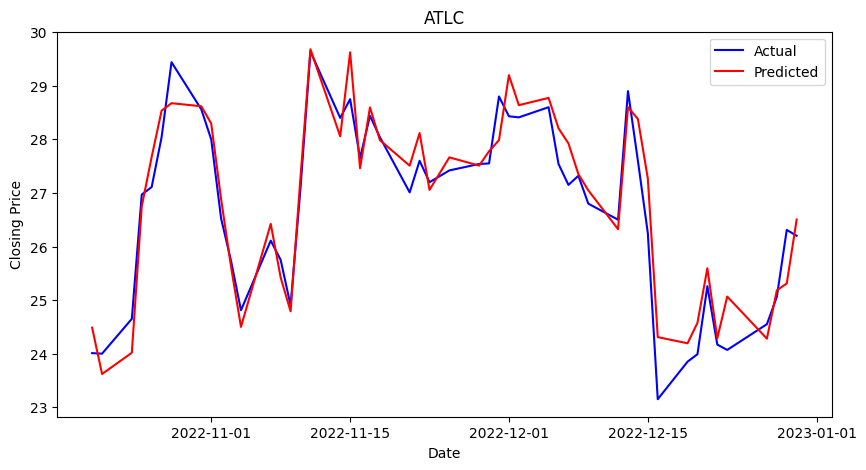



For ATLCL:
Mean Squared Error: 0.05914534251082237
R^2 Score: 0.8816913519830544


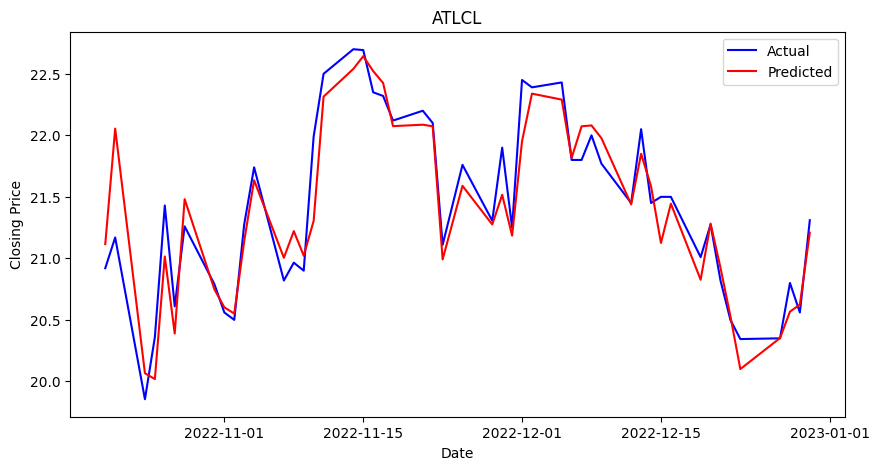



For ATLCP:
Mean Squared Error: 0.036432324412388375
R^2 Score: 0.9865939680694593


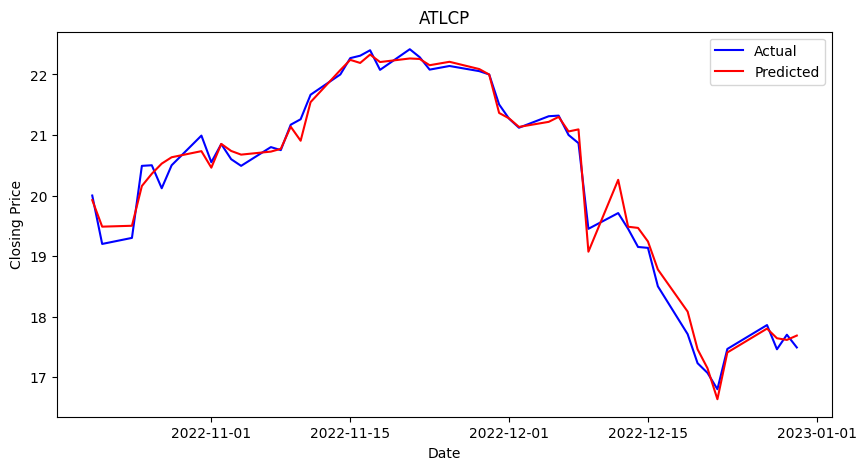



For ATLO:
Mean Squared Error: 0.011619565429416421
R^2 Score: 0.919641529304606


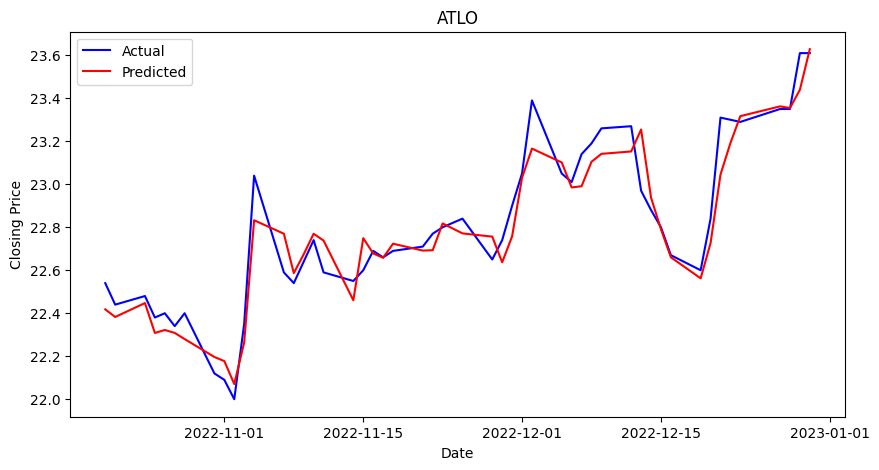

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linear_r2_score = []
for company in company_list:
    print(f"For {company}:")
    company_data = company_data_dict[company]
    train_data = company_data.iloc[:-50]
    test_data = company_data.iloc[-50:]
    X_train, y_train = train_data.drop(['date', 'close', 'next_day', 'target', 'Daily Return'], axis=1), train_data['close']
    X_test, y_test = test_data.drop(['date', 'close', 'next_day', 'target', 'Daily Return'], axis=1), test_data['close']
    dates_test = test_data['date']
    
    model = LinearRegression()
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    r2 = r2_score(y_test, y_pred)
    linear_r2_score.append(r2)
    print(f"R^2 Score: {r2}")

    plt.figure(figsize=(10, 5))
    plt.plot(dates_test, y_test, label='Actual', color='blue')
    plt.plot(dates_test, y_pred, label='Predicted', color='red')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(company)
    plt.legend()
    plt.show()
    print("\n")

avg_linear_r2_score = sum(linear_r2_score)/len(linear_r2_score)

<br>
<br>
<h3>XGBoost Regression</h3>

In [18]:
from xgboost import XGBRegressor

For ASLE:
Mean Squared Error: 0.08940232861490578
R^2 Score: 0.9776987792001539


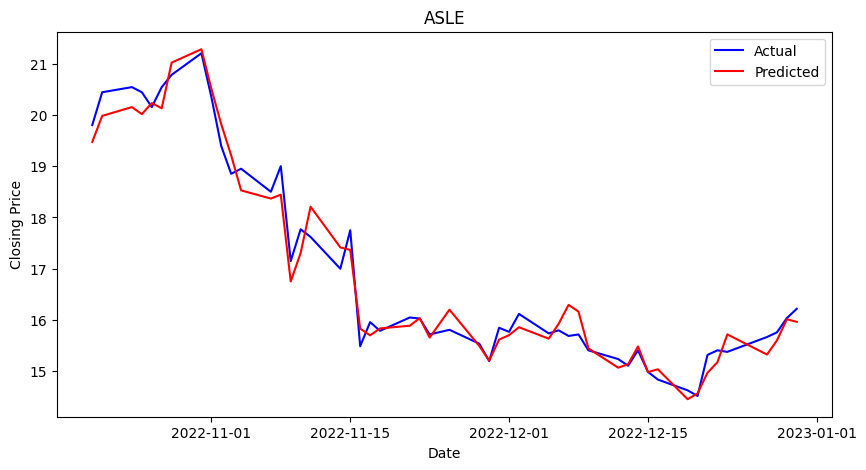



For ASLN:
Mean Squared Error: 0.007485236309630925
R^2 Score: 0.9247858876028691


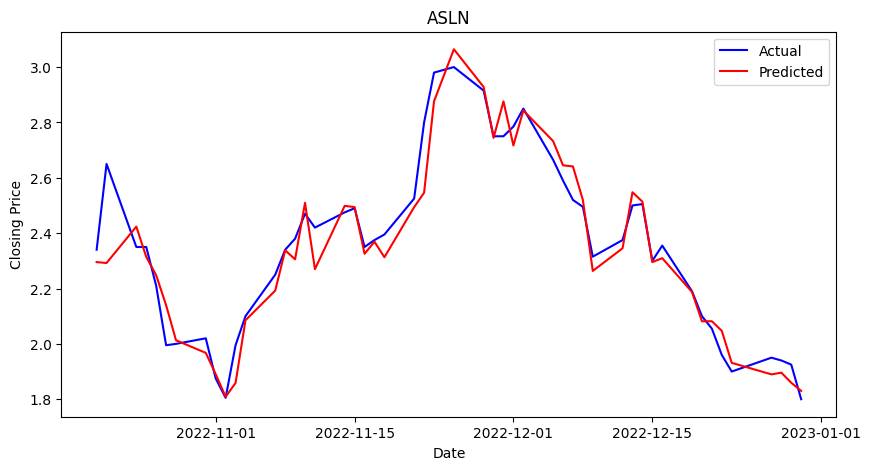



For ASMB:
Mean Squared Error: 0.021137765603277216
R^2 Score: 0.1831433955920876


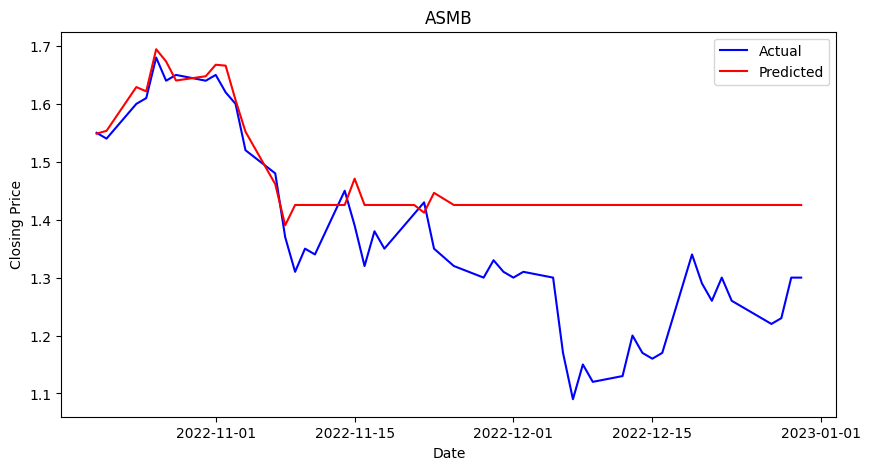



For ASML:
Mean Squared Error: 63.78039760584014
R^2 Score: 0.9792797154589056


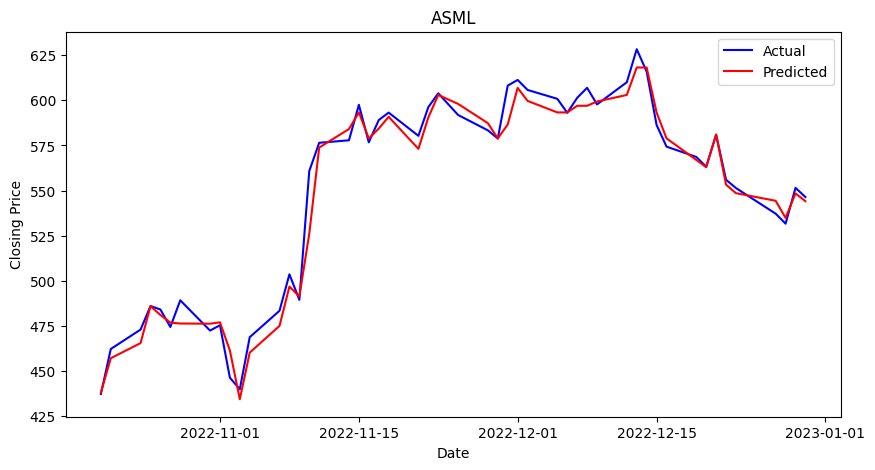



For ASND:
Mean Squared Error: 6.574840150166999
R^2 Score: 0.8189457965758561


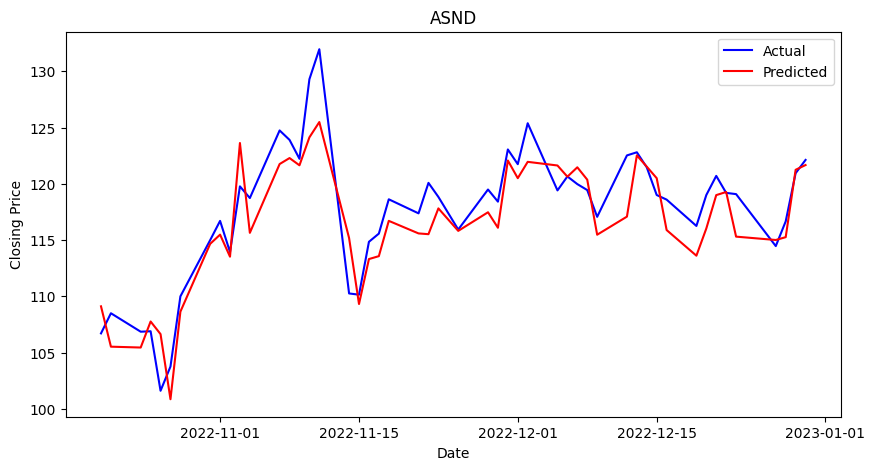



For ASO:
Mean Squared Error: 3.869064314054267
R^2 Score: 0.802967444950635


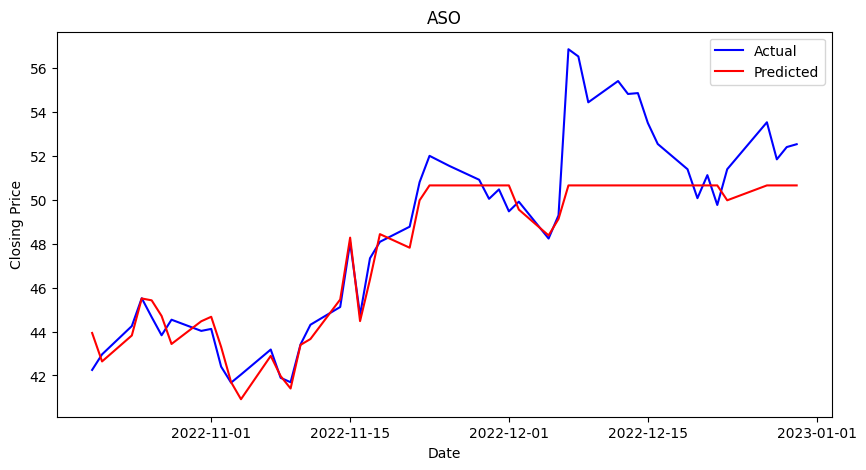



For ASPA:
Mean Squared Error: 0.023236836165579013
R^2 Score: -2.3472536312991705


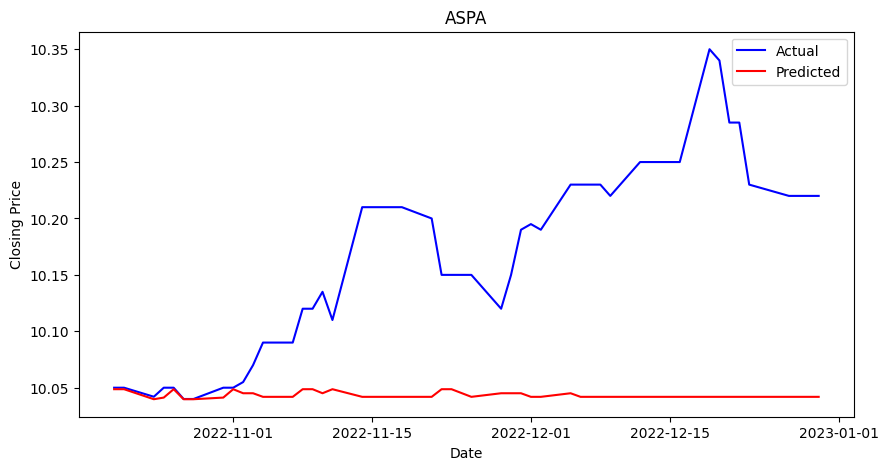



For ASPAU:
Mean Squared Error: 0.0006560141219233628
R^2 Score: -0.6531196051131951


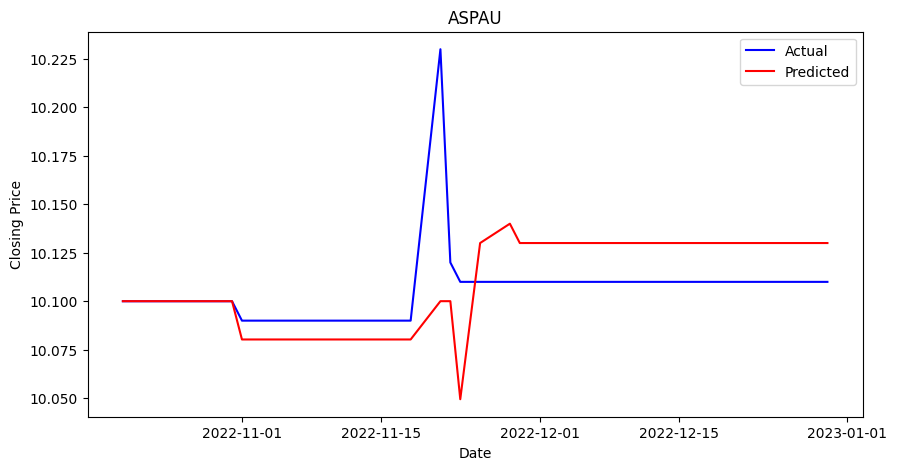



For ASPS:
Mean Squared Error: 3.9289687051858353
R^2 Score: 0.20594464053194206


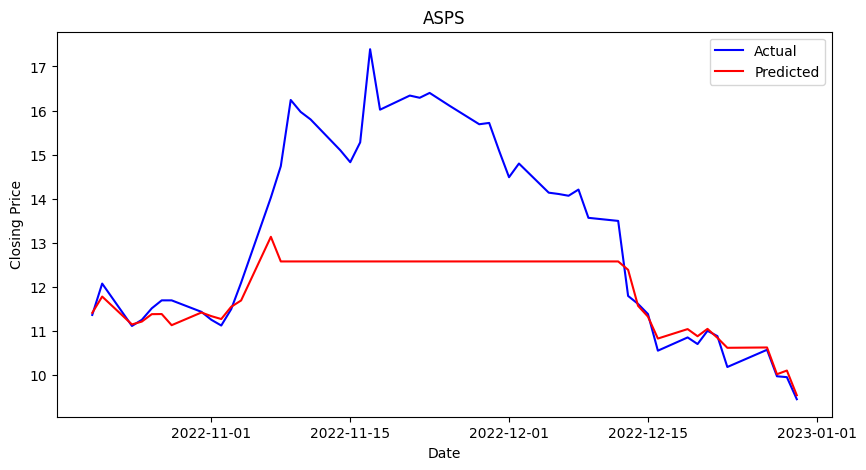



For ASRT:
Mean Squared Error: 0.010914142091318134
R^2 Score: 0.9647857356862047


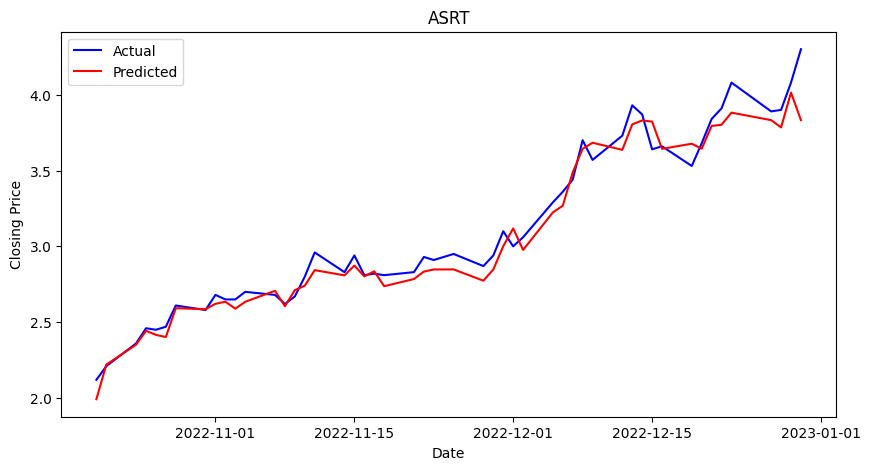



For ASRV:
Mean Squared Error: 0.0014729423913274785
R^2 Score: 0.42834773538913307


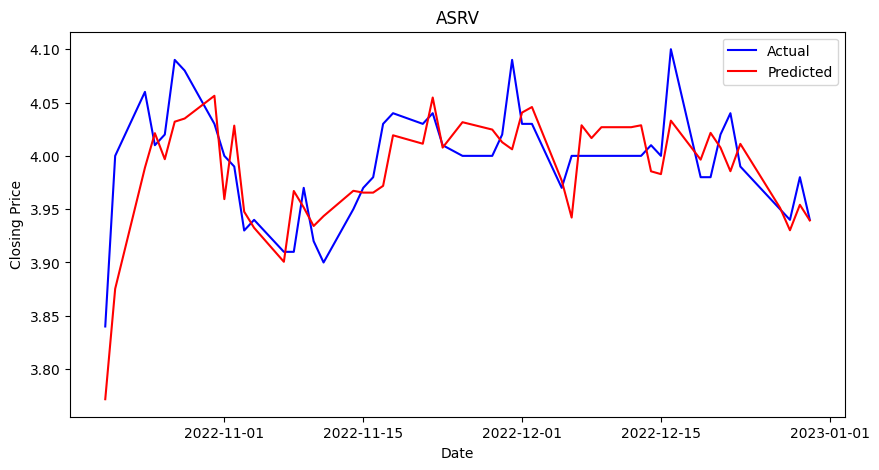



For ASTC:
Mean Squared Error: 1.128038586049424
R^2 Score: 0.08258852010745477


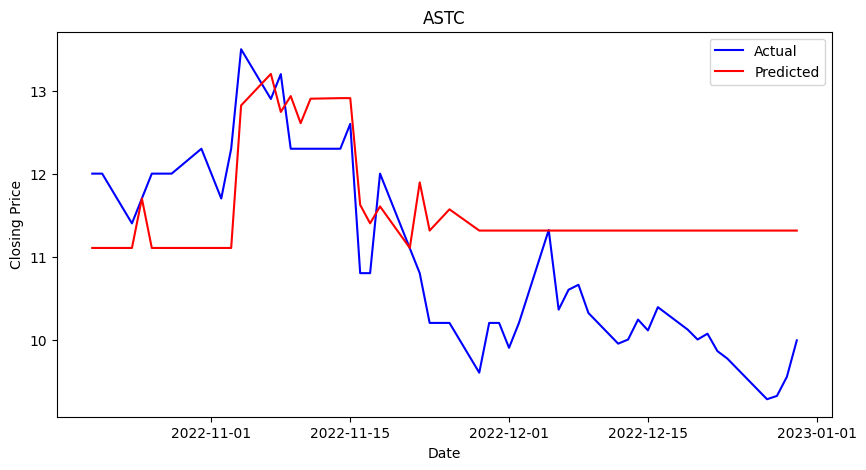



For ASTE:
Mean Squared Error: 0.313059926025161
R^2 Score: 0.9246401711846708


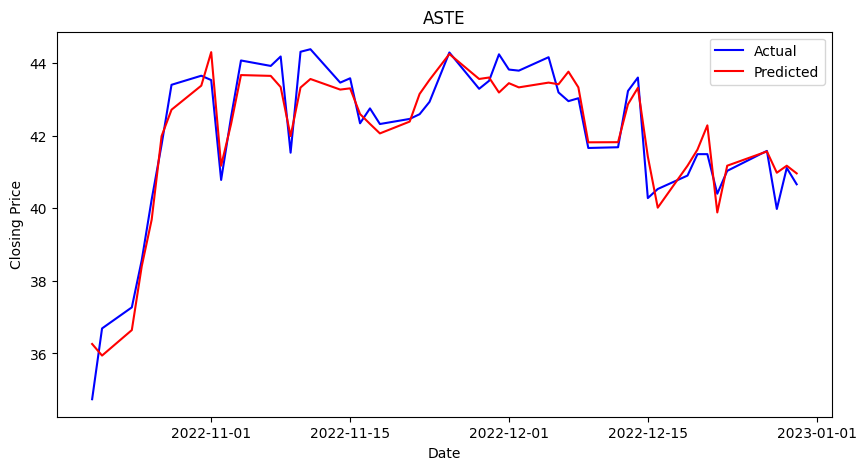



For ASTL:
Mean Squared Error: 0.115429287660304
R^2 Score: 0.07140261065872322


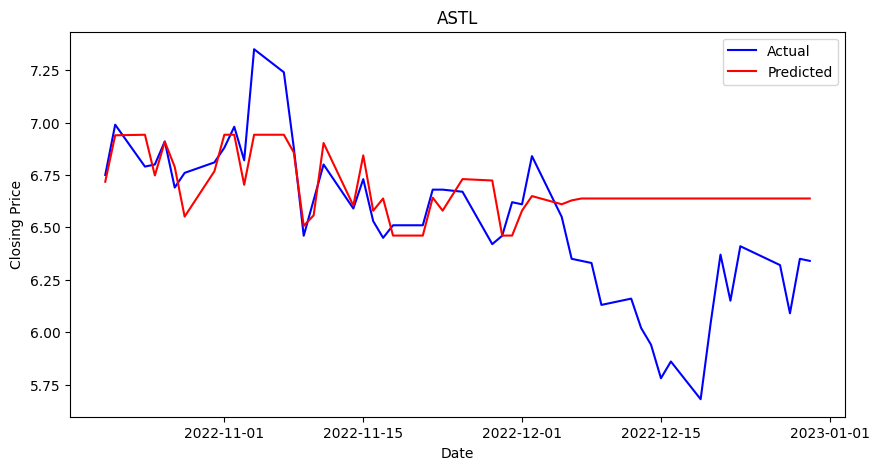



For ASTR:
Mean Squared Error: 0.0040472994087946135
R^2 Score: -0.036082724347103134


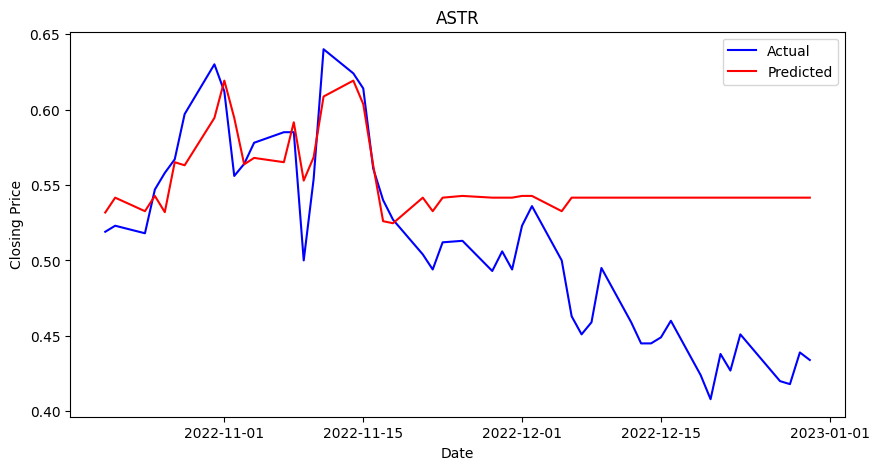



For ASTS:
Mean Squared Error: 0.5931186636177482
R^2 Score: 0.6753916185485083


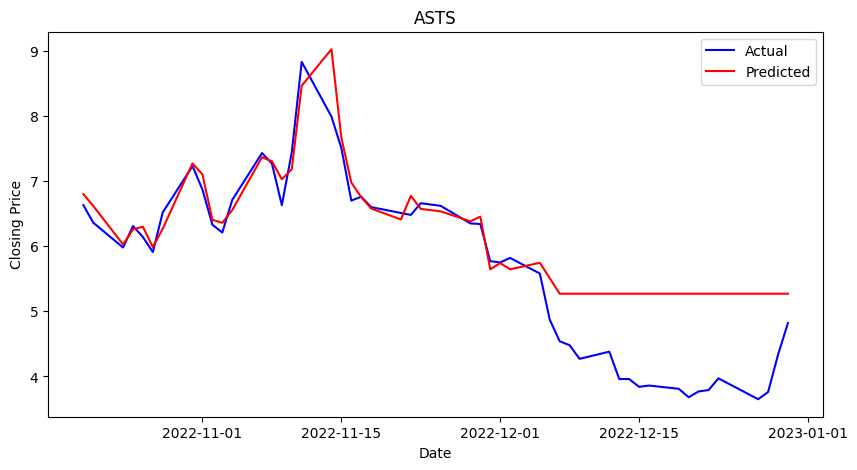



For ASUR:
Mean Squared Error: 0.6320047809735797
R^2 Score: 0.6021385266897774


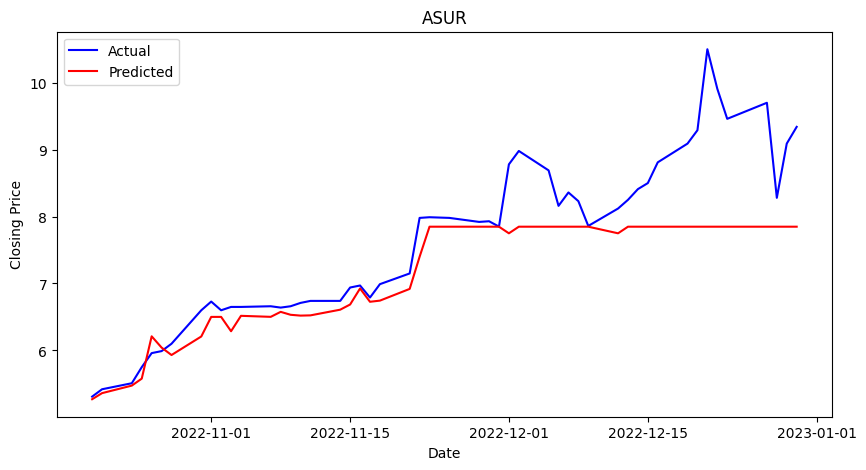



For ASYS:
Mean Squared Error: 0.03460962904069676
R^2 Score: 0.9666876738928761


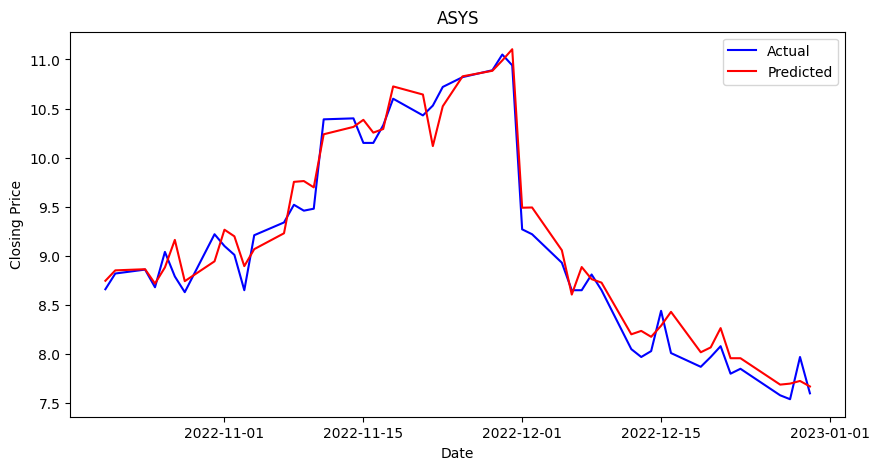



For ATAI:
Mean Squared Error: 0.02553286458179514
R^2 Score: 0.5677524585465532


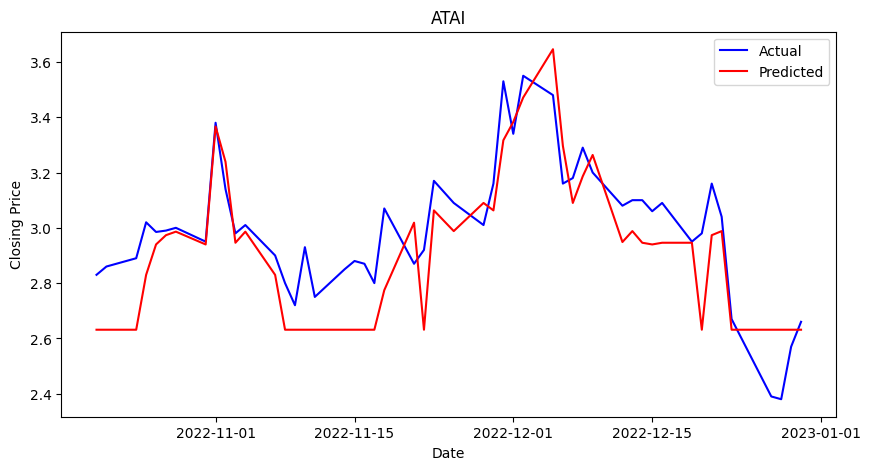



For ATCOL:
Mean Squared Error: 0.31544065018948375
R^2 Score: -1.770806366457614


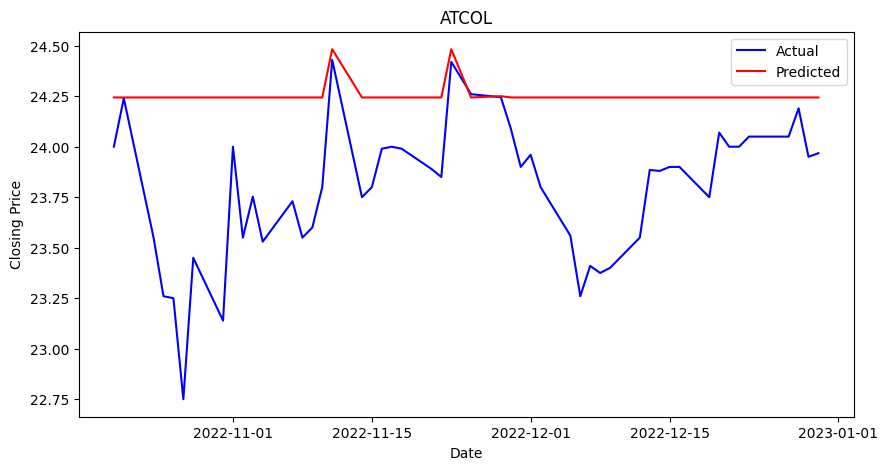



For ATEC:
Mean Squared Error: 0.05853056353829749
R^2 Score: 0.8942502362748468


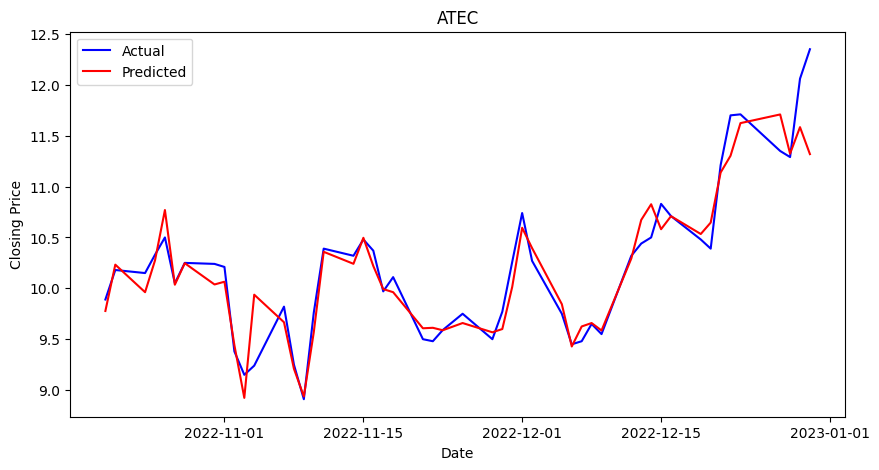



For ATER:
Mean Squared Error: 0.014675751366863778
R^2 Score: 0.004494758568289736


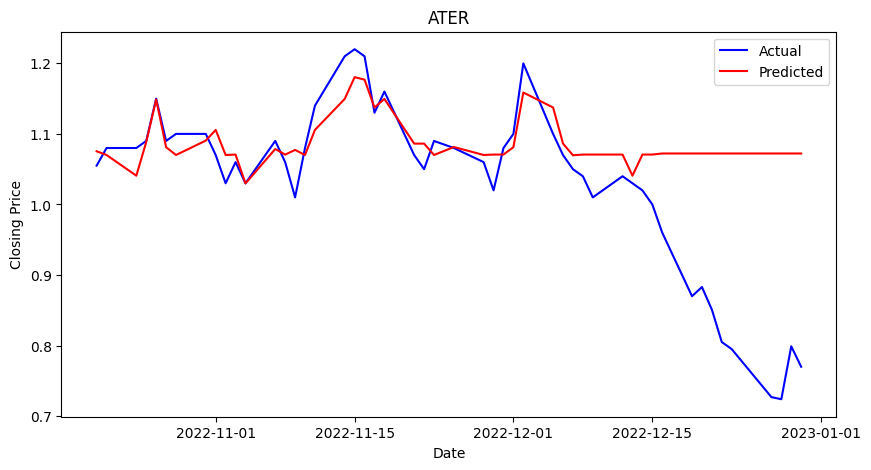



For ATEX:
Mean Squared Error: 1.506745361859575
R^2 Score: 0.7938711914371505


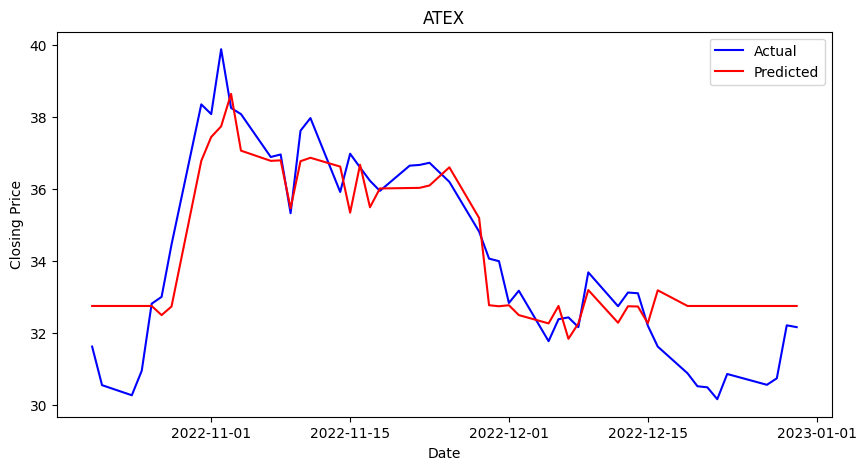



For ATHA:
Mean Squared Error: 0.003397035575294465
R^2 Score: 0.8908329090459015


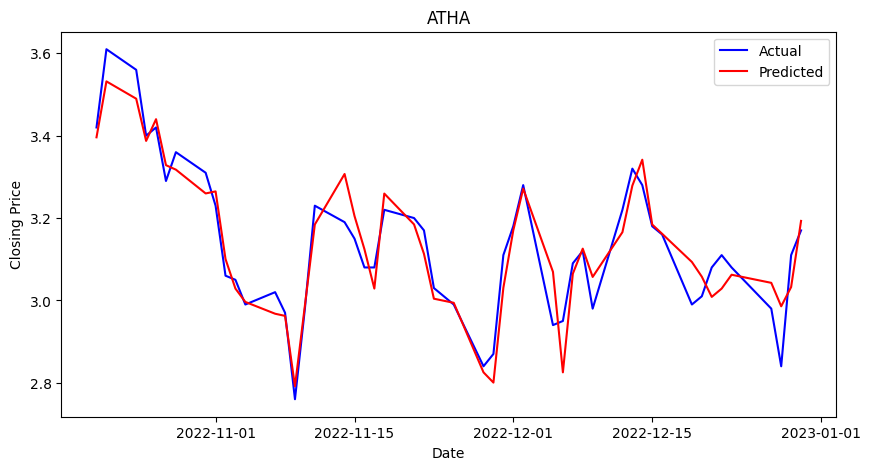



For ATHE:
Mean Squared Error: 0.4631932605274517
R^2 Score: -2.623679587857353


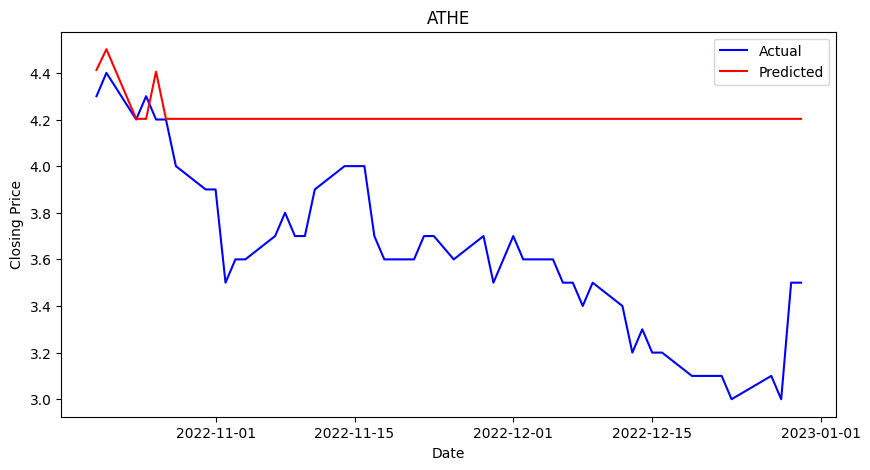



For ATHX:
Mean Squared Error: 0.2807641416646271
R^2 Score: 0.47207672539776135


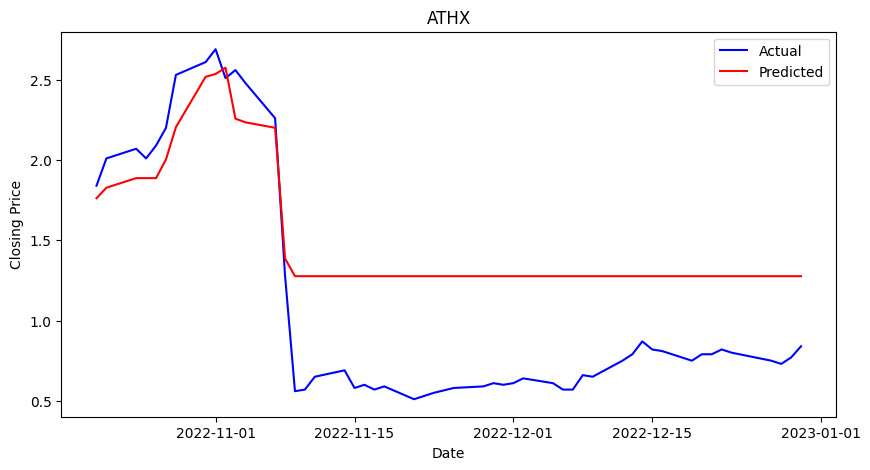



For ATIF:
Mean Squared Error: 0.010516191750042482
R^2 Score: 0.8819105624493674


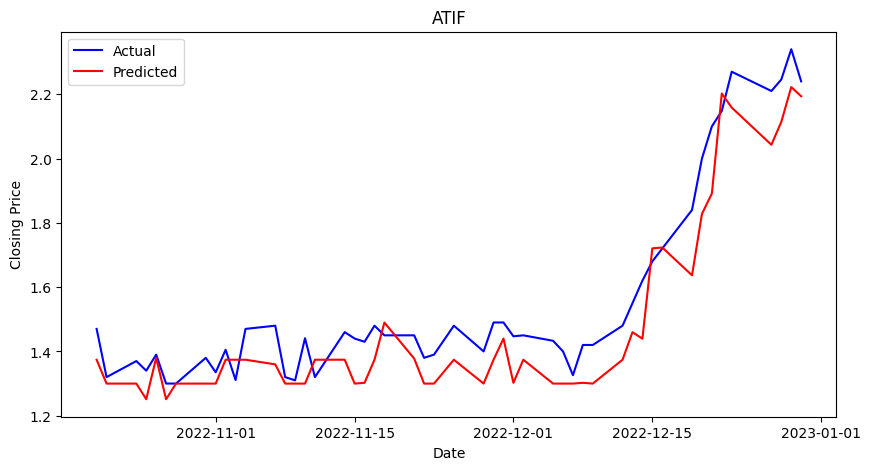



For ATLC:
Mean Squared Error: 0.6858690122827821
R^2 Score: 0.7541115295672771


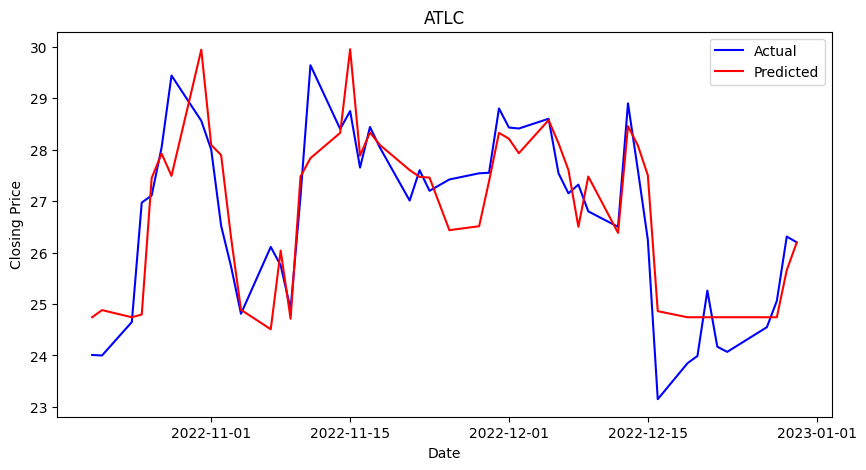



For ATLCL:
Mean Squared Error: 0.4093186971087562
R^2 Score: 0.1812382918547869


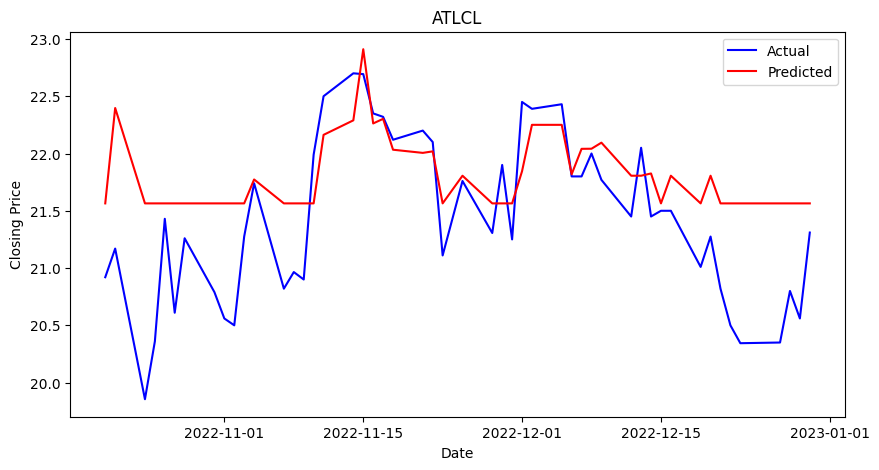



For ATLCP:
Mean Squared Error: 1.2948745147991574
R^2 Score: 0.5235239757159675


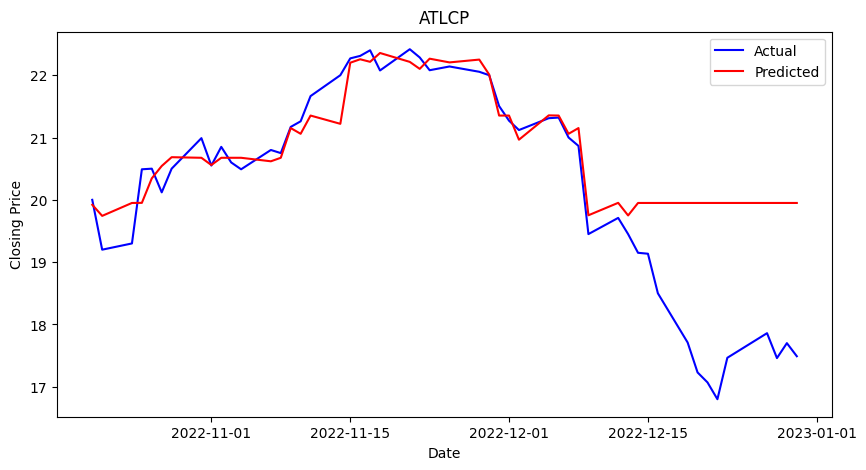



For ATLO:
Mean Squared Error: 0.022064533274024103
R^2 Score: 0.8474063284656539


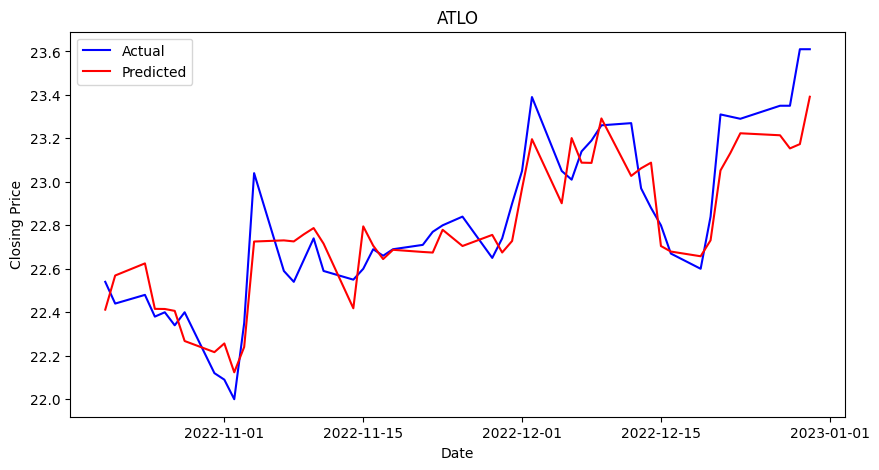

In [19]:
XGB_r2_score = []
for company in company_list:
    print(f"For {company}:")
    company_data = company_data_dict[company]
    train_data = company_data.iloc[:-50]
    test_data = company_data.iloc[-50:]
    X_train, y_train = train_data[['open', 'high', 'low']], train_data['close']
    X_test, y_test = test_data[['open', 'high', 'low']], test_data['close']
    dates_test = test_data['date']
    
    model = XGBRegressor()
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    r2 = r2_score(y_test, y_pred)
    print(f"R^2 Score: {r2}")
    XGB_r2_score.append(r2)

    plt.figure(figsize=(10, 5))
    plt.plot(dates_test, y_test, label='Actual', color='blue')
    plt.plot(dates_test, y_pred, label='Predicted', color='red')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(company)
    plt.legend()
    plt.show()
    print("\n")
    
avg_XGB_r2_score = sum(XGB_r2_score)/len(XGB_r2_score)

<br>
<br>
<h3>Random Forest Classifier</h3>

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

RF_acc_score = []
for company in company_list:
    print("\033[1m" + company + "\033[0m"+":")
    company_data = company_data_dict[company]
    train_data = company_data.iloc[:-50]
    test_data = company_data.iloc[-50:]
    X_train, y_train = train_data[['open', 'high', 'low', 'close', 'next_day']], train_data['target']
    scaled = StandardScaler().fit(X_train)
    X_test, y_test = test_data[['open', 'high', 'low', 'close', 'next_day']], test_data['target']
    dates_test = test_data['date']
    
    model = RandomForestClassifier()
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    dfr = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    print(dfr.head())
    acc = accuracy_score(y_test,y_pred)
    print(f"\nAccuracy: {acc}\n\n")
    RF_acc_score.append(acc)

avg_RF_acc_score = sum(RF_acc_score)/len(RF_acc_score)

ASLE:
     Actual  Predicted
201    True       True
202    True       True
203   False       True
204   False      False
205    True       True

Accuracy: 0.84


ASLN:
     Actual  Predicted
452    True       True
453   False      False
454   False      False
455   False      False
456   False      False

Accuracy: 0.78


ASMB:
     Actual  Predicted
703   False      False
704    True      False
705    True       True
706    True       True
707   False      False

Accuracy: 0.52


ASML:
     Actual  Predicted
954    True       True
955    True       True
956    True       True
957   False      False
958   False      False

Accuracy: 0.88


ASND:
      Actual  Predicted
1205    True       True
1206   False      False
1207    True      False
1208   False      False
1209    True      False

Accuracy: 0.76


ASO:
      Actual  Predicted
1456    True      False
1457    True       True
1458    True       True
1459   False      False
1460   False      False

Accuracy: 0.76


ASPA:
      Actua

<br>
<h1>Analysing which model has best performance</h1>

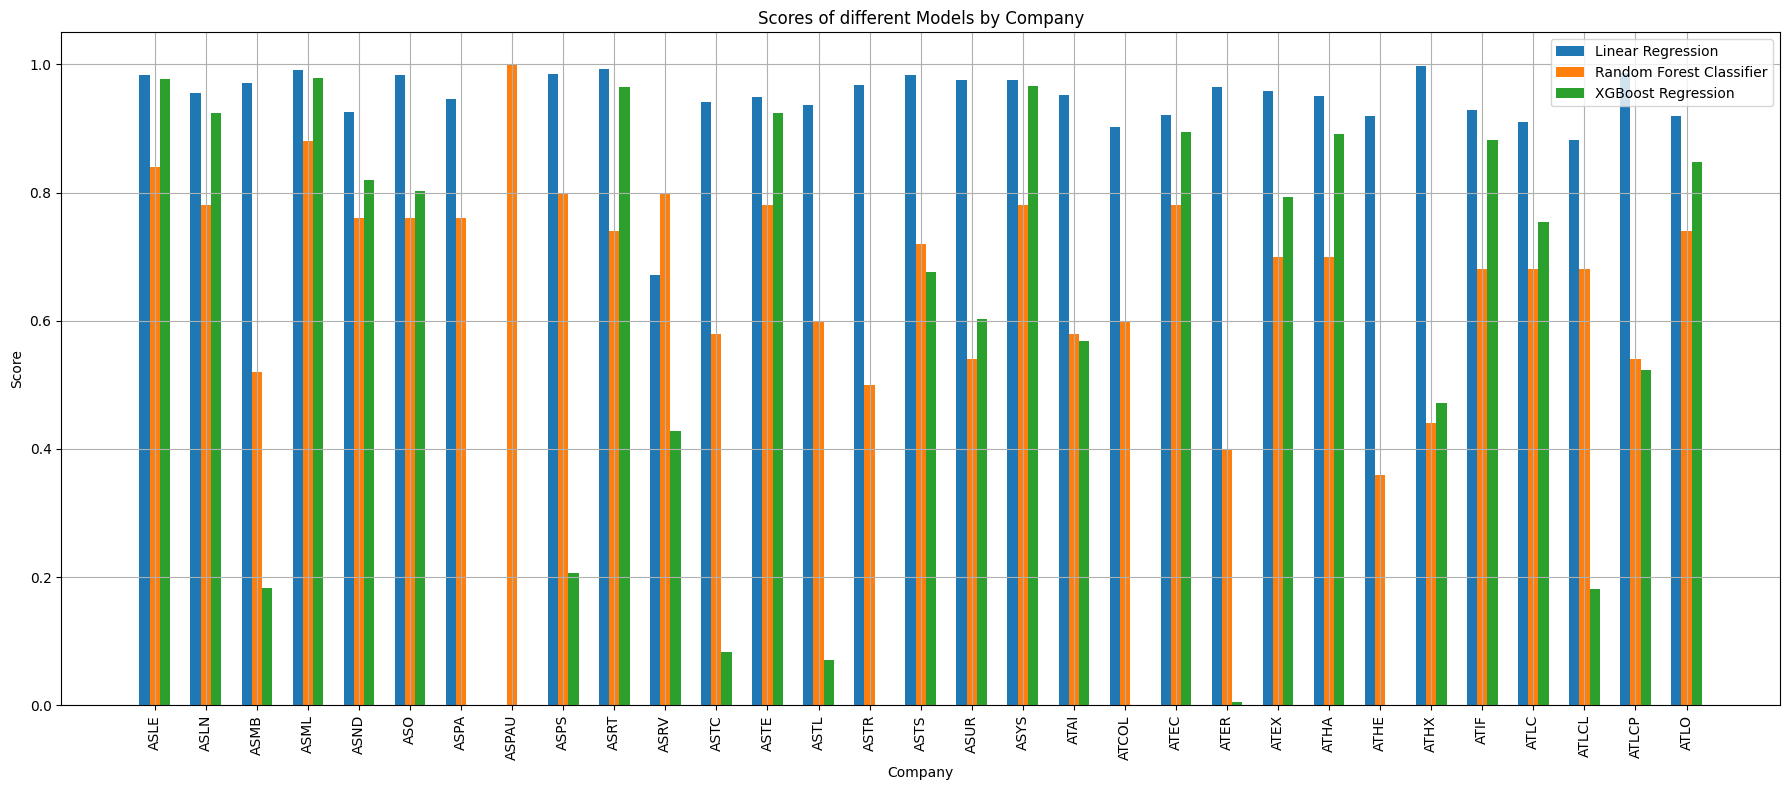

Mean r2 score of Linear Regression: 0.9015542182845016
Mean r2 score of XGBoost Regression: 0.28997662271996516
Mean accuracy score of Random Forest Regression: 0.6780645161290323


In [21]:
models = ['Linear Regression', 'Random Forest Classifier', 'XGBoost Regression']
score_lists = [linear_r2_score, RF_acc_score, XGB_r2_score]

num_tickers_to_plot = len(company_list)

ticker_indices = np.arange(num_tickers_to_plot)

bar_width = 0.2

plt.figure(figsize=(18, 8))

for i, (model, score_list) in enumerate(zip(models, score_lists)):
    positive_score_list = [score if score >= 0 else 0 for score in score_list]
    bar_positions = ticker_indices + (i * bar_width)
    
    plt.bar(bar_positions, positive_score_list[:num_tickers_to_plot], width=bar_width, label=model)

plt.xlabel('Company')
plt.ylabel('Score')
plt.title('Scores of different Models by Company')
plt.xticks(ticker_indices + bar_width, company_list[:num_tickers_to_plot], rotation=90)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

print(f"Mean r2 score of Linear Regression: {avg_linear_r2_score}")
print(f"Mean r2 score of XGBoost Regression: {avg_XGB_r2_score}")
print(f"Mean accuracy score of Random Forest Regression: {avg_RF_acc_score}")

<br>
<h1>Visualization</h1>

<font size="5" color="green" face="verdana"><b>Based on the above analysis, our stock market data fits best with the Linear Regression algorithm and gives the r2 score of 0.9.  </b></font>